# LeadScout

## Problem Statement:
**X Education needs to develop a model to prioritize leads with high conversion rates.**

- X Education requires assistance in selecting the most promising leads with a high likelihood of converting into paying customers.

- Our task is to develop a model that assigns a lead score to each lead, enabling us to prioritize customers with higher scores who have a greater chance of conversion.

- The CEO has indicated that the target lead conversion rate should be approximately 80%.


**There are quite a few goals for this case study. -**

- Build a logistic regression model to assign a lead score between 0 and 100 to each lead, which the company can use to target potential leads.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future, so you will need to handle these as well.

- These problems are provided in a separate doc file.


## Step-1: Data Understanding

### 1.1 Importing Libraries

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from sklearn.metrics import precision_recall_curve

from sklearn.feature_selection import chi2

### 1.2 Importing Warnings

In [545]:
import warnings
warnings.filterwarnings("ignore")

### 1.3 Importing Data

In [546]:
leads=pd.read_csv("D:\iiitb\gradedd assignments\logistic Regression model\Lead Scoring Assignment\Leads.csv")

In [547]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

### 1.4 Data Size Analysis

In [548]:
print ("Data Size:",leads.shape)

Data Size: (9240, 37)


### 1.5 : Data Quality Assessment and Remediation 

#### 1.5.1 Null Values counting

**We propose a function to replace "select" values with "none" in categorical variables to optimise the lead scoring process and improve accuracy of lead score calculations.**

In [549]:
# Converting all the values to lower case
leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [550]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leads = leads.replace('select',np.nan)

In [551]:
print("Number of null values in data", leads.isnull().sum())

Number of null values in data Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            

**This analysis focuses on a variable, namely "null_Val_Percentage" which represent the percentage of null values in the "leads" data**


In [552]:
null_Val_Percentage= leads.isnull().sum()/len(leads)*100
print(null_Val_Percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**We have observed a significant presence of null values in the dataset, indicating the need for appropriate handling and treatment of these missing values.**

#### 1.5.2  Identification of Duplicate Data in the Dataset

In [553]:
#Dup is the variable which stores duplicate values from the data.
Dup=leads[leads.duplicated()]


In [554]:
Dup

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [555]:
print(Dup.sum())

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

**We have conducted a thorough examination of the dataset and determined that there are no instances of duplicate data present.**

#### 1.5.3 Identification and Resolution of Ambiguous Data in the Dataset

In [556]:
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened


After meticulous scrutiny, it has been determined that the dataset does not contain any instances of ambiguous data

## Step-2: Data Cleaning and Preparation

### 2.1  Null Value and Unique Value Identification and Handling: A Standardized Approach

Handling Null Values in a Standard Method:

1. Check missing value percentage:
   a) Drop values if missing > 40-50% (or > 60-70% in some cases).
   b) For missing < 40%, proceed to step 2.

2. For numerical variables:
   Replace missing values with column mean.

3. For categorical variables:
   Replace missing values with column mode.

Note: This approach ensures effective handling of null values.


#### 2.1.1 Defining function for analysis of categorical and numerical variables.


In [557]:
def categorical_analysis(data, x):
    """
    Function to plot a countplot for categorical variables.
    
    Parameters:
    - data: DataFrame containing the data.
    - x: Name of the categorical variable for the x-axis.
    """

    sns.countplot(x)
    plt.xticks(rotation=90)
    
    null_val = x.isnull().sum()
    mode_val = x.mode()
    
    print("Since",x.unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
    
    data.fillna(mode_val,inplace=True)
    
    print("Recheck for null values:",x.isnull().sum())

In [558]:
def numerical_analysis(data, x):
    """
    Function to plot a box plot for numerical variables.
    
    Parameters:
    - data: DataFrame containing the data.
    - x: Name of the numerical variable for the x-axis.
    """
    sns.boxplot(x)
    
    null_val = x.isnull().sum()
    mean_val = x.mean()
    median_val = x.median()
    check_val = math.fmod(median_val, mean_val)
    
    print("mean is:",mean_val)
    print("median is:",median_val)
    
    if check_val < 0.5:
        rep_val = mean_val
        print("The difference between mean and median is not much so mean can be used to replace null values")
        print("Thus,",x,"\n is a numerical variable having,",null_val,",null values, therefore we replace them with," , rep_val,",which is the mean.")
        data.fillna(rep_val,inplace=True)
    else:
        rep_val = median_val
        print("The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median")
        print("Thus,",x,"\n is a numerical variable having,",null_val,",null values, therefore we replace them with," , rep_val,",which is the median.")
        data.fillna(rep_val,inplace=True)
        
    print("Recheck for null values:",x.isnull().sum())

#### 2.1.2 Handling Null Values

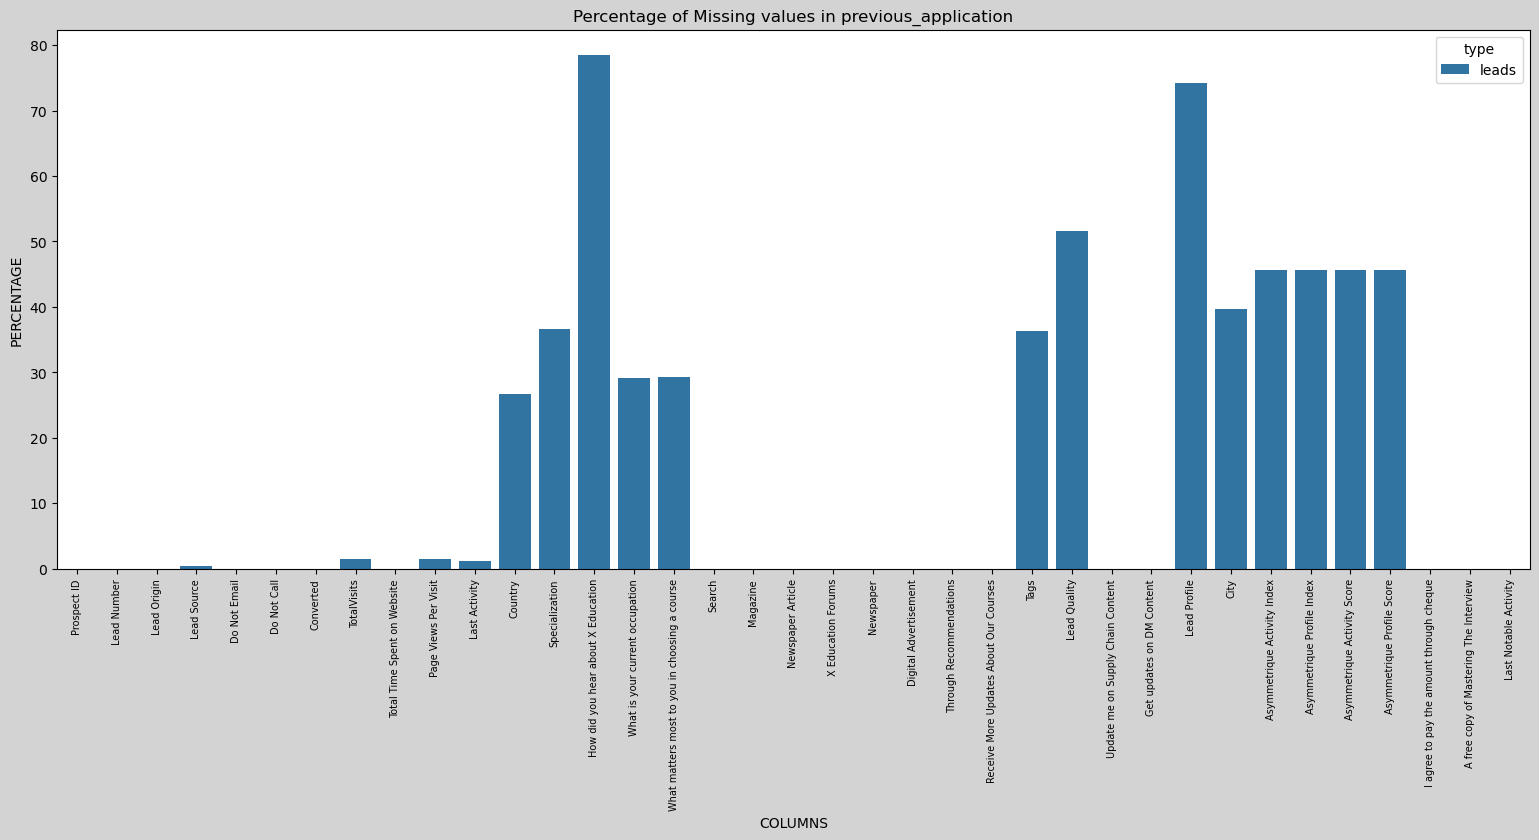

In [559]:
fig2 = plt.figure(figsize=(19,7))
miss_previous_application = pd.DataFrame((leads.isnull().sum())*100/leads.shape[0]).reset_index()
miss_previous_application["type"] = "leads"
ax = sns.barplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("w")
fig2.set_facecolor("lightgrey")

**The utilization of a bar plot aids in identifying variables with missing values exceeding 40%. Such variables can be dropped under the assumption of Missing Completely At Random (MCAR) pattern.**

In [560]:
#Removing columns with missing values more than 40%
leads=leads.drop(["How did you hear about X Education","Lead Quality","Lead Profile","City","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Profile Score","Asymmetrique Activity Score"],axis=1)

#### 2.1.3 Unique Value:

In [561]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [562]:
# Dropping unique valued columns
leads= leads.drop(['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

#### 2.1.4 Handing Null Values Column by Column

Since ['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'welingak website' 'reference' 'facebook' nan 'blog' 'pay per click ads'
 'bing' 'social media' 'welearn' 'click2call' 'live chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm'] 
 is a categorical variable having 36 null values, therefore we replace them with, 0    india
Name: Country, dtype: object ,which is the mode.
Recheck for null values: 0


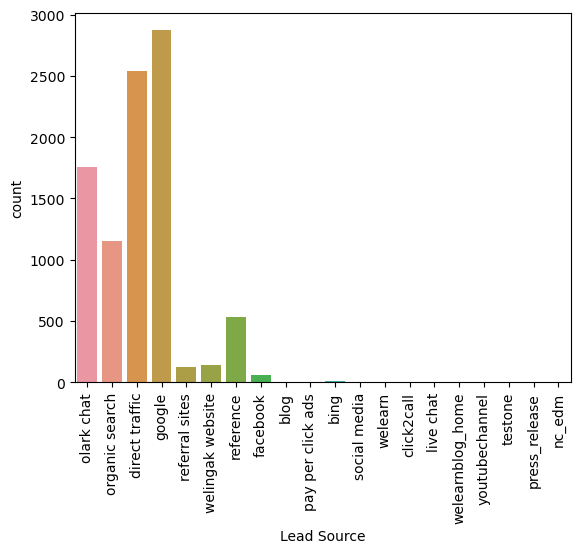

In [563]:
#categorical_analysis(leads, leads["Lead Source"])
sns.countplot(leads["Lead Source"])
plt.xticks(rotation=90)
    
null_val = leads["Lead Source"].isnull().sum()
mode_val = leads["Country"].mode()
    
print("Since",leads["Lead Source"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["Lead Source"].fillna("Google",inplace=True)
    
print("Recheck for null values:",leads["Lead Source"].isnull().sum())

Since ['page visited on website' 'email opened' 'unreachable'
 'converted to lead' 'olark chat conversation' 'email bounced'
 'email link clicked' 'form submitted on website' 'unsubscribed'
 'had a phone conversation' 'view in browser link clicked' nan
 'approached upfront' 'sms sent' 'visited booth in tradeshow'
 'resubscribed to emails' 'email received' 'email marked spam'] 
 is a categorical variable having 103 null values, therefore we replace them with, 0    email opened
Name: Last Activity, dtype: object ,which is the mode.
Recheck for null values: 2461


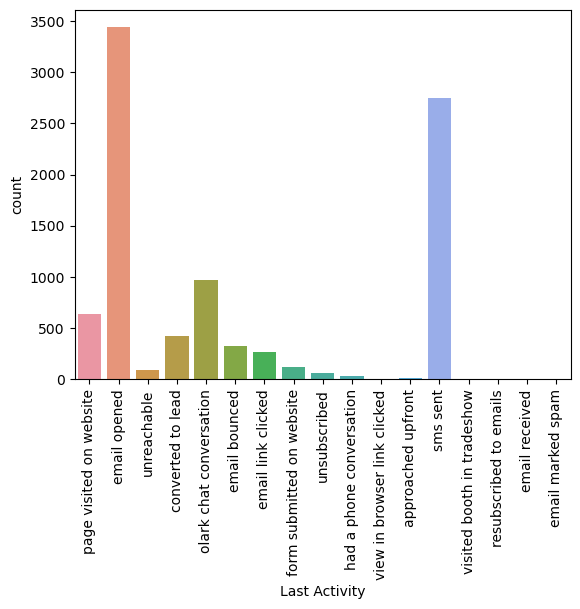

In [564]:
#categorical_analysis(leads, leads["Last Activity"])
sns.countplot(leads["Last Activity"])
plt.xticks(rotation=90)
    
null_val = leads["Last Activity"].isnull().sum()
mode_val = leads["Last Activity"].mode()
    
print("Since",leads["Last Activity"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["Last Activity"].fillna("email opened",inplace=True)
    
print("Recheck for null values:",leads["Country"].isnull().sum())

Since [nan 'india' 'russia' 'kuwait' 'oman' 'united arab emirates'
 'united states' 'australia' 'united kingdom' 'bahrain' 'ghana'
 'singapore' 'qatar' 'saudi arabia' 'belgium' 'france' 'sri lanka' 'china'
 'canada' 'netherlands' 'sweden' 'nigeria' 'hong kong' 'germany'
 'asia/pacific region' 'uganda' 'kenya' 'italy' 'south africa' 'tanzania'
 'unknown' 'malaysia' 'liberia' 'switzerland' 'denmark' 'philippines'
 'bangladesh' 'vietnam' 'indonesia'] 
 is a categorical variable having 2461 null values, therefore we replace them with, 0    india
Name: Country, dtype: object ,which is the mode.
Recheck for null values: 0


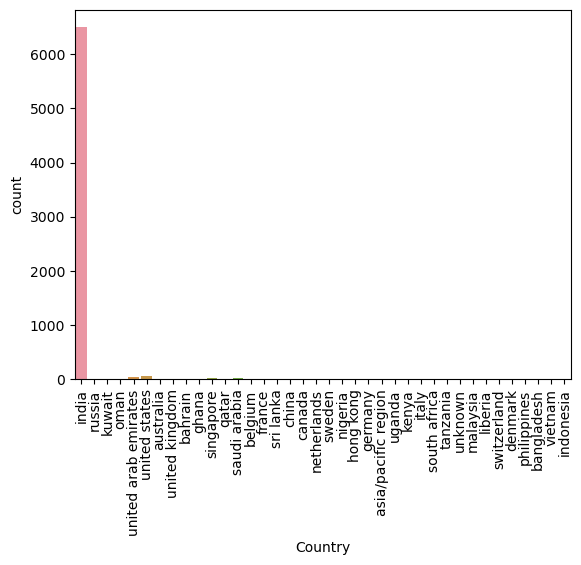

In [565]:
#categorical_analysis(leads, leads["Country"])
sns.countplot(leads["Country"])
plt.xticks(rotation=90)
    
null_val = leads["Country"].isnull().sum()
mode_val = leads["Country"].mode()
    
print("Since",leads["Country"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["Country"].fillna("india",inplace=True)
    
print("Recheck for null values:",leads["Country"].isnull().sum())

Since [nan 'business administration' 'media and advertising'
 'supply chain management' 'it projects management' 'finance management'
 'travel and tourism' 'human resource management' 'marketing management'
 'banking, investment and insurance' 'international business' 'e-commerce'
 'operations management' 'retail management' 'services excellence'
 'hospitality management' 'rural and agribusiness' 'healthcare management'
 'e-business'] 
 is a categorical variable having 3380 null values, therefore we replace them with, 0    finance management
Name: Specialization, dtype: object ,which is the mode.
Recheck for null values: 0


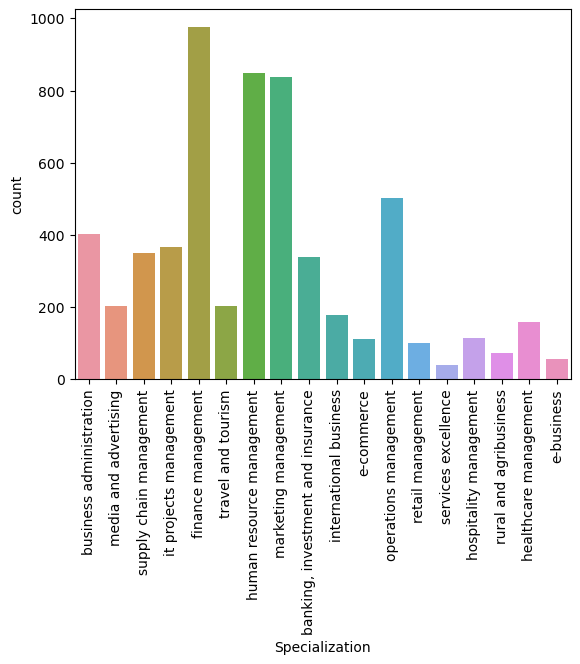

In [566]:
#categorical_analysis(leads, leads["Specialization"])
sns.countplot(leads["Specialization"])
plt.xticks(rotation=90)
    
null_val = leads["Specialization"].isnull().sum()
mode_val = leads["Specialization"].mode()
    
print("Since",leads["Specialization"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["Specialization"].fillna("finance management",inplace=True)
    
print("Recheck for null values:",leads["Specialization"].isnull().sum())

Since ['unemployed' 'student' nan 'working professional' 'businessman' 'other'
 'housewife'] 
 is a categorical variable having 2690 null values, therefore we replace them with, 0    unemployed
Name: What is your current occupation, dtype: object ,which is the mode.
Recheck for null values: 0


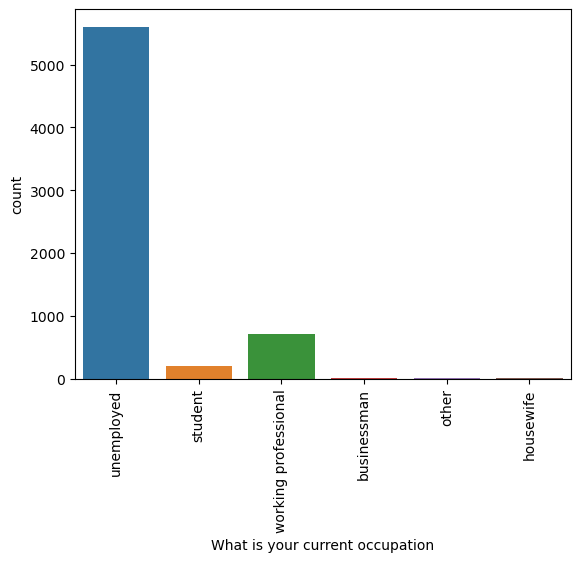

In [567]:
#categorical_analysis(leads, leads["What is your current occupation"])
sns.countplot(leads["What is your current occupation"])
plt.xticks(rotation=90)
    
null_val = leads["What is your current occupation"].isnull().sum()
mode_val = leads["What is your current occupation"].mode()
    
print("Since",leads["What is your current occupation"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["What is your current occupation"].fillna("unemployed",inplace=True)
    
print("Recheck for null values:",leads["What is your current occupation"].isnull().sum())

Since ['better career prospects' nan 'flexibility & convenience' 'other'] 
 is a categorical variable having 2709 null values, therefore we replace them with, 0    better career prospects
Name: What matters most to you in choosing a course, dtype: object ,which is the mode.
Recheck for null values: 0


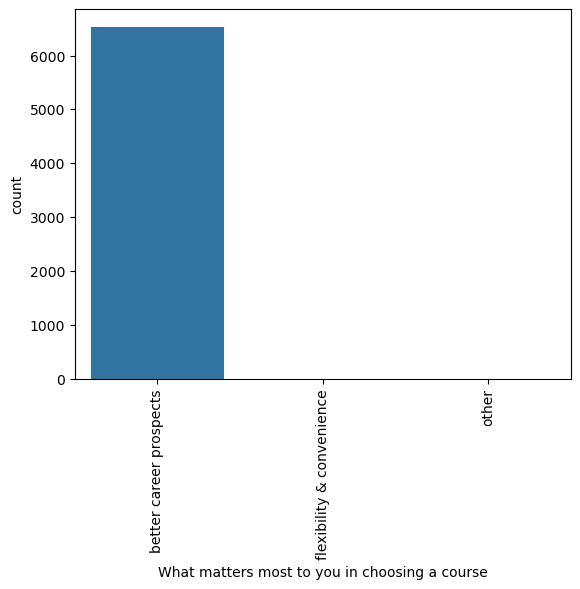

In [568]:
#categorical_analysis(leads, leads["What matters most to you in choosing a course"])
sns.countplot(leads["What matters most to you in choosing a course"])
plt.xticks(rotation=90)
    
null_val = leads["What matters most to you in choosing a course"].isnull().sum()
mode_val = leads["What matters most to you in choosing a course"].mode()
    
print("Since",leads["What matters most to you in choosing a course"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["What matters most to you in choosing a course"].fillna("better career prospects",inplace=True)
    
print("Recheck for null values:",leads["What matters most to you in choosing a course"].isnull().sum())

Since ['interested in other courses' 'ringing'
 'will revert after reading the email' nan 'lost to eins'
 'in confusion whether part time or dlp' 'busy' 'switched off'
 'in touch with eins' 'already a student' 'diploma holder (not eligible)'
 'graduation in progress' 'closed by horizzon' 'number not provided'
 'opp hangup' 'not doing further education' 'invalid number'
 'wrong number given' 'interested  in full time mba' 'still thinking'
 'lost to others' 'shall take in the next coming month' 'lateral student'
 'interested in next batch' 'recognition issue (dec approval)'
 'want to take admission but has financial problems'
 'university not recognized'] 
 is a categorical variable having 3353 null values, therefore we replace them with, 0    will revert after reading the email
Name: Tags, dtype: object ,which is the mode.
Recheck for null values: 0


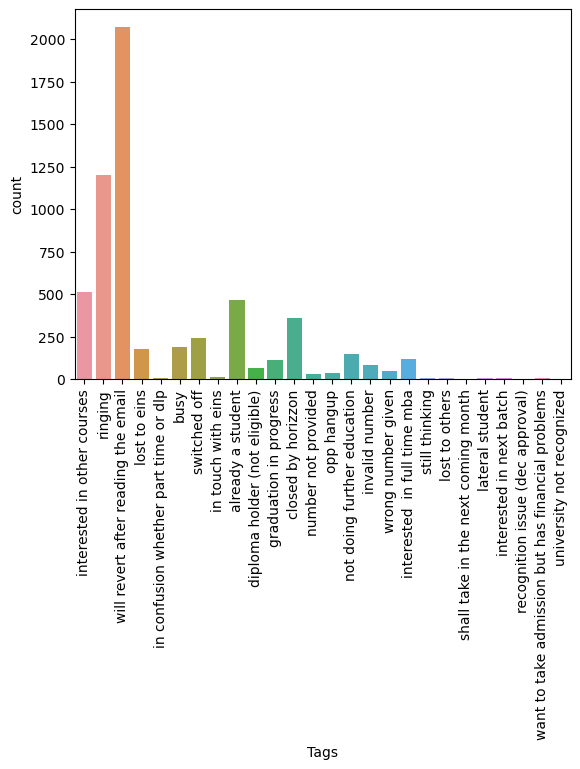

In [569]:
#categorical_analysis(leads, leads["Tags"])
sns.countplot(leads["Tags"])
plt.xticks(rotation=90)
    
null_val = leads["Tags"].isnull().sum()
mode_val = leads["Tags"].mode()
    
print("Since",leads["Tags"].unique(),"\n is a categorical variable having",null_val,"null values, therefore we replace them with," , mode_val,",which is the mode.")
leads["Tags"].fillna("will revert after reading the email",inplace=True)
    
print("Recheck for null values:",leads["Tags"].isnull().sum())

mean is: 3.445237833681204
median is: 3.0
The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median
Thus, 0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: TotalVisits, Length: 9240, dtype: float64 
 is a numerical variable having, 137 ,null values, therefore we replace them with, 3.0 ,which is the median.
Recheck for null values: 0


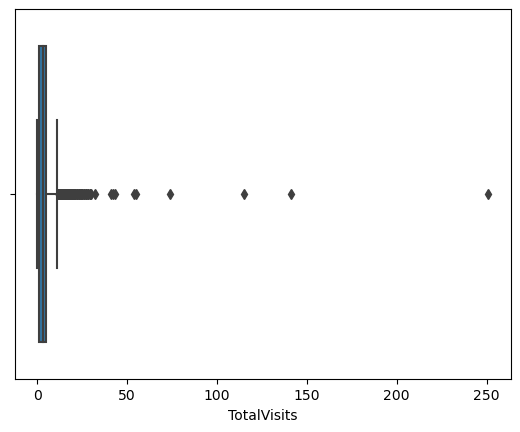

In [570]:
numerical_analysis(leads, leads["TotalVisits"])

mean is: 2.372267316017316
median is: 2.0
The difference between mean and median is too much so mean cannot be used to replace null values, thus we use median
Thus, 0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64 
 is a numerical variable having, 0 ,null values, therefore we replace them with, 2.0 ,which is the median.
Recheck for null values: 0


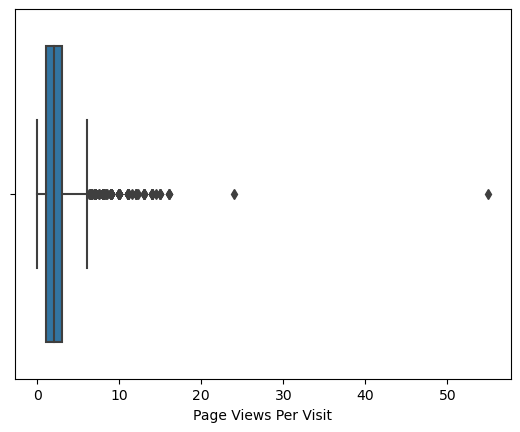

In [571]:
numerical_analysis(leads, leads["Page Views Per Visit"])

In [572]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

### 2.2 Data Transformation

**We will create a new column named "AD_Source" by merging various columns to identify the ad sources.**

In [573]:
leads['AD_Source'] = leads[['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']].apply(lambda x: '_'.join(x), axis=1)

ad_source_mapping = {'no_no_no_no_no': 'No Sources',
                     'yes_no_no_no_no': 'Search',
                     'no_no_no_no_yes': 'Digital Advertisement',
                     'no_no_no_yes_no': 'Newspaper',
                     'yes_yes_yes_no_yes': 'All Except Newspaper',
                     'no_yes_no_no_no': 'X Education Forums'}

leads['AD_Source'] = leads['AD_Source'].map(ad_source_mapping)
leads['AD_Source'].isnull().sum()

0

In [574]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [575]:
leads=leads.drop(['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'],axis=1)



### 2.3 Removing Unwanted Columns

In [576]:
leads=leads.drop(['Last Notable Activity', 'Tags', 'Last Activity','Do Not Email','Do Not Call','Lead Origin'],axis=1)

In [577]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9240 non-null   object 
 1   Converted                                      9240 non-null   int64  
 2   TotalVisits                                    9240 non-null   float64
 3   Total Time Spent on Website                    9240 non-null   int64  
 4   Page Views Per Visit                           9240 non-null   float64
 5   Country                                        9240 non-null   object 
 6   Specialization                                 9240 non-null   object 
 7   What is your current occupation                9240 non-null   object 
 8   What matters most to you in choosing a course  9240 non-null   object 
 9   Through Recommendations                        9240 

### 2.4 Assessing Skewness and Removing Skewed Values: Analyzing Data Distribution
Skewness in data can affect the performance of logistic regression by violating the assumption of linearity. It may lead to biased parameter estimates and reduced model accuracy. Transforming skewed variables or using robust regression techniques can help mitigate the impact of skewness on logistic regression models.

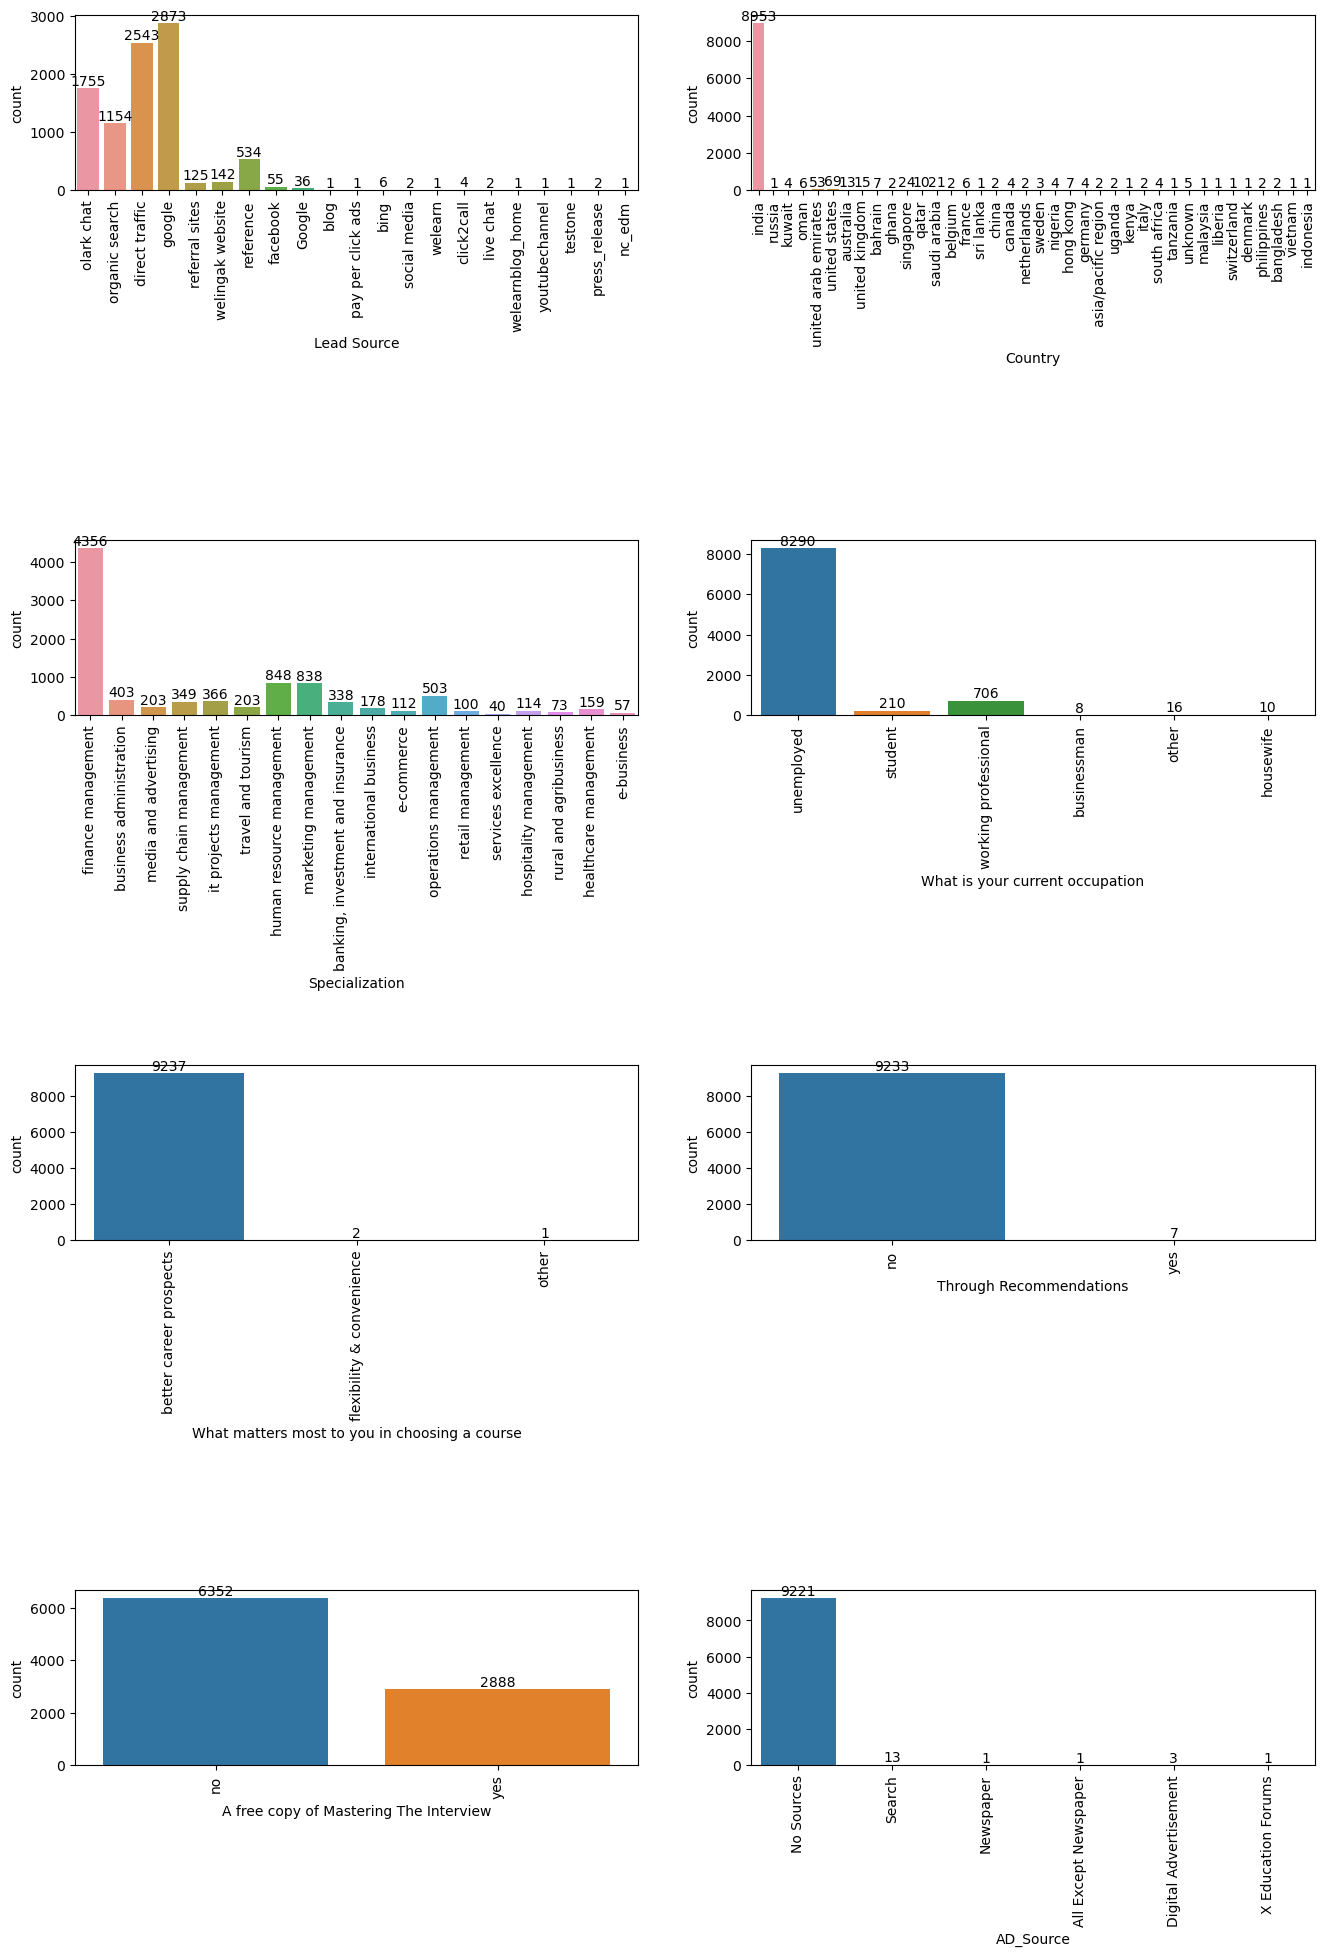

In [578]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(16,50))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

In [579]:
# Calculate skewness of numerical variables
numerical_cols = leads.select_dtypes(include='number').columns.tolist()
skewness_num = leads[numerical_cols].skew()
# Display the skewness values
print(skewness_num)

Converted                       0.471058
TotalVisits                    20.061230
Total Time Spent on Website     0.956450
Page Views Per Visit            2.874914
dtype: float64


**The skewness values for the variables you provided are as follows:**

- Converted: 0.471058
- TotalVisits: 20.061230
- Total Time Spent on Website: 0.956450
- Page Views Per Visit: 2.874914

These values indicate the degree of skewness in each variable's distribution. A skewness value of **0** suggests a **perfectly symmetrical distribution**, while **positive skewness indicates a right-skewed** (long-tailed on the right) distribution, and **negative skewness indicates a left-skewed** (long-tailed on the left) distribution. 

In this case, the **"TotalVisits" and "Page Views Per Visit" variables have higher positive skewness values, suggesting a right-skewed distribution.** The "Total Time Spent on Website" variable also has a positive skewness value, but it is closer to 0. The "Converted" variable has a relatively low positive skewness value, indicating a slight right-skewness in its distribution.

Understanding the skewness of variables can help in determining appropriate data transformation or analysis techniques to account for the skewed distributions during modeling or analysis.

In [580]:
# Dropping columns with highly skewed data
leads.drop(['Through Recommendations','AD_Source','What matters most to you in choosing a course','TotalVisits','Country'],axis=1,inplace=True)

**The numeric columns' skewness can be treated by using methords like outlier treatment and the other ccategorical columns' skewness can be treated by grouping categories with low frequency**. 

### 2.4 Assessing Outliers:
**Outliers in logistic regression can have several effects:**

1. **Impact on parameter estimates:** Outliers can exert undue influence on the estimated coefficients in logistic regression. Since logistic regression is sensitive to extreme values, outliers can distort the parameter estimates and lead to biased results.

2. **Influence on model fit:** Outliers can affect the fit of the logistic regression model. They can increase the variability of the model and reduce its overall goodness of fit. This can result in less accurate predictions and reduced model performance.

3. **Violation of assumptions:** Logistic regression assumes that the relationship between the predictors and the log-odds of the response variable is linear. Outliers may introduce non-linearity or violate other assumptions of the logistic regression model, such as independence of errors or absence of multicollinearity.

4. **Reduced interpretability:** Outliers can lead to unstable or inconsistent estimates of the model coefficients, making it difficult to interpret the effects of the predictors on the probability of the response variable. This can undermine the interpretability and reliability of the logistic regression results.

**To mitigate the impact of outliers in logistic regression, various approaches can be employed, such as:**
- **Winsorization or trimming:** Winsorizing or trimming the extreme values can help minimize the influence of outliers.
- **Data transformation:** Applying appropriate transformations, such as logarithmic or power transformations, can reduce the impact of outliers and make the data more suitable for logistic regression.
- **Robust regression techniques:** Using robust regression techniques, such as robust logistic regression or robust standard errors, can provide more reliable estimates by downweighting the influence of outliers.

**It is important to identify and handle outliers carefully in logistic regression analysis to ensure accurate and reliable model results.**

<AxesSubplot:xlabel='Total Time Spent on Website'>

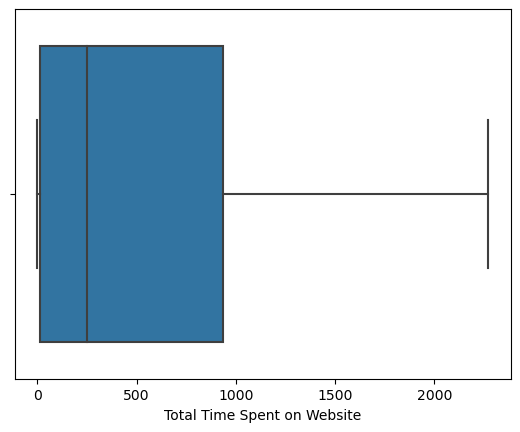

In [581]:
sns.boxplot(leads['Total Time Spent on Website'])

**Outlier treatment is not required in this case**

<AxesSubplot:xlabel='Page Views Per Visit'>

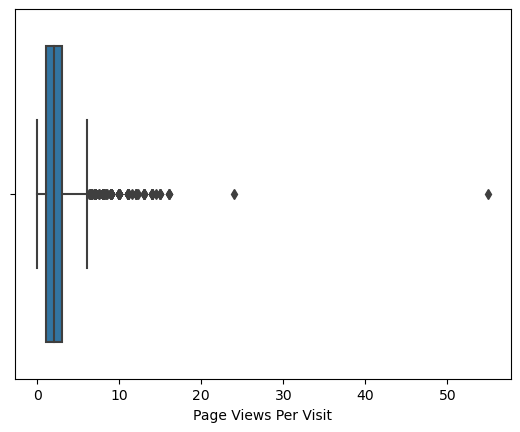

In [582]:
sns.boxplot(leads['Page Views Per Visit'])

In [583]:
# before outlier treatment
leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,0.385390,487.698268,2.372267
std,0.486714,548.021466,2.146715
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000
50%,0.000000,248.000000,2.000000
75%,1.000000,936.000000,3.000000
95%,1.000000,1562.000000,6.000000
max,1.000000,2272.000000,55.000000


In [584]:
def treat_outliers(data, column, k=1.5):
    """
    Treats outliers in a given column of a DataFrame using Tukey's method.
    
    Args:
    - data: DataFrame, the data containing the column with outliers
    - column: str, the name of the column with outliers
    - k: float, the Tukey's coefficient (default is 1.5)
    
    Returns:
    - DataFrame, the data with treated outliers in the specified column
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    # Replace outliers with the upper and lower bounds
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return data


In [585]:
treat_outliers(leads,['Page Views Per Visit'], k=1.5)

,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,olark chat,0,0,0.00,finance management,unemployed,no
1,organic search,0,674,2.50,finance management,unemployed,no
2,direct traffic,1,1532,2.00,business administration,student,yes
3,direct traffic,0,305,1.00,media and advertising,unemployed,no
4,google,1,1428,1.00,finance management,unemployed,no
...,...,...,...,...,...,...,...
9235,direct traffic,1,1845,2.67,it projects management,unemployed,no
9236,direct traffic,0,238,2.00,media and advertising,unemployed,yes
9237,direct traffic,0,199,2.00,business administration,unemployed,yes
9238,google,1,499,3.00,human resource management,unemployed,no


<AxesSubplot:xlabel='Page Views Per Visit'>

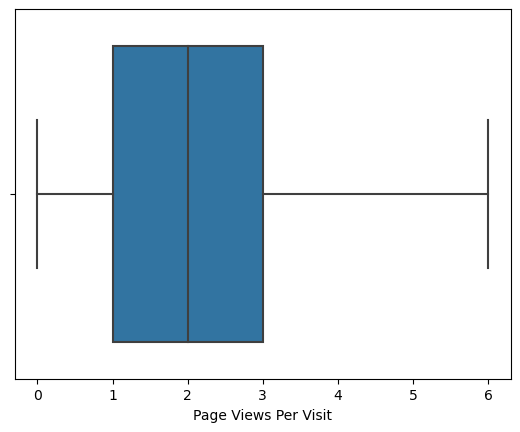

In [586]:
sns.boxplot(leads['Page Views Per Visit'])

In [587]:
leads['Page Views Per Visit'].skew()

0.41603522900443207

**Skewness is reduced.**

### 2.5 Normalising Values:

**Normalizing values in logistic regression is important for several reasons:**

1. **Scale Independence:** Logistic regression coefficients are estimated using maximum likelihood estimation, which assumes that the predictors are on the same scale. By normalizing the values, we ensure that the predictors have a similar range and magnitude, making the coefficients more interpretable and comparable.

2. **Convergence:** Normalizing the values can improve the convergence properties of the logistic regression algorithm. When predictors have different scales, it can lead to slower convergence or numerical instability in the estimation process. Normalization helps to overcome these issues and ensures stable and efficient estimation.

3. **Interpretation:** Normalizing the values makes the coefficients more easily interpretable. The coefficients represent the change in log-odds for a one-unit change in the predictor variable. When the predictors are on the same scale, it becomes easier to compare the magnitudes and impacts of different predictors on the outcome variable.

4. **Avoiding Bias:** In logistic regression, the predictors with larger scales may dominate the estimation process and have a disproportionate influence on the model. Normalizing the values helps to prevent this bias and ensures that all predictors contribute equally to the model fitting process.

**Overall, normalizing values in logistic regression helps to improve the stability, interpretability, and performance of the model. It ensures that the coefficients accurately represent the relationships between the predictors and the outcome variable.**

In [588]:


# Select the numerical columns to be normalized
numerical_columns = ['Total Time Spent on Website','Page Views Per Visit']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
leads[numerical_columns] = scaler.fit_transform(leads[numerical_columns])



### 2.6 Handling Low Frequency Categories in Categorical Variables: Standardization and Combining

In [589]:
# Grouping low frequency value levels to Others
leads['Lead Source'] = leads['Lead Source'].replace(["click2call","press_release",
                                                           "social media","live chat","youtubechannel",
                                                           "testone","pay per click ads","welearnblog_home",
                                                           "welearn","blog","nc_edm"],"Others")

# Changing google to Google
leads['Lead Source'] = leads['Lead Source'].replace("google","Google")

In [590]:
# value_counts percentage after replace
leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
direct traffic      27.521645
olark chat          18.993506
organic search      12.489177
reference            5.779221
welingak website     1.536797
referral sites       1.352814
facebook             0.595238
Others               0.183983
bing                 0.064935
Name: Lead Source, dtype: float64

In [591]:
leads['Specialization']=leads['Specialization'].replace(["e-business","services excellence","rural and agribusiness"],"Others")

In [592]:
# value_counts percentage after replace
leads['Specialization'].value_counts(normalize=True)*100

finance management                   47.142857
human resource management             9.177489
marketing management                  9.069264
operations management                 5.443723
business administration               4.361472
it projects management                3.961039
supply chain management               3.777056
banking, investment and insurance     3.658009
media and advertising                 2.196970
travel and tourism                    2.196970
international business                1.926407
Others                                1.839827
healthcare management                 1.720779
hospitality management                1.233766
e-commerce                            1.212121
retail management                     1.082251
Name: Specialization, dtype: float64

In [593]:
leads['What is your current occupation']=leads['What is your current occupation'].replace(["other","housewife","businessman"],"Others")

In [594]:
# value_counts percentage after replace
leads['What is your current occupation'].value_counts(normalize=True)*100

unemployed              89.718615
working professional     7.640693
student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

In [595]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [596]:
leads['Free_copy'] = leads['Free_copy'].replace({'yes':1 ,'no':0})
leads['Free_copy'].value_counts()

0    6352
1    2888
Name: Free_copy, dtype: int64

## Step-3: Exploratory Data Analysis

### 3.1 Univariate Analysis

In [597]:
def cat_UVA(data,x,my_labels=[]):
    """
    a function for univariate analysis of Categorical Variables
    
    """
    plt.pie(x.value_counts(),labels=my_labels)
    plt.legend()
    plt.show()

In [598]:
def num_UVA(data,x,my_list=["x_lab","y_lab","title"]):
    """
    a function for univariate analysis of Discontinouse Numerical Variables
    
    """
    null_val = x.isnull().sum()
    tol_val = x.value_counts().sum()
    per_null_val = (null_val/tol_val)*100
    if per_null_val != 0:
        mean_val = x.mean()
        median_val = x.median()
        check_val = math.fmod(median_val, mean_val)
        if check_val < 0.5:
            rep_val = mean_val
            data.fillna(rep_val,inplace=True)
            
        else:
            rep_val = median_val
            data.fillna(rep_val,inplace=True)
        
        
    total=len(x)    
    ax=sns.countplot(x)
    plt.xticks(rotation=90)
    plt.title(my_list[2])
    plt.ylabel(my_list[1])
    plt.xlabel(my_list[0])
    for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    plt.show()

In [599]:
def num_cont_UVA(data, x, bin_no, my_color=[], my_list=["x_lab", "y_lab", "title"]):
    """
    A function for univariate analysis of continuous numerical variables.
    """
    plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference
    
    x_bins = pd.cut(x, bins=bin_no, right=False)
    x_bins = x_bins.astype('str')
    x_plot = plt.hist(x_bins, color=my_color,align='mid')
    plt.xticks(rotation=90, ha='right')
    plt.xlim(0, bin_no)
    plt.title(my_list[2])
    plt.ylabel(my_list[1])
    plt.xlabel(my_list[0])
    plt.show()


In [600]:
leads.head(2)

,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Specialization,Current_occupation,Free_copy
0,olark chat,0,0.000000,0.000000,finance management,unemployed,0
1,organic search,0,0.296655,0.416667,finance management,unemployed,0


In [601]:
leads.dtypes

Lead Source                     object
Converted                        int64
Total Time Spent on Website    float64
Page Views Per Visit           float64
Specialization                  object
Current_occupation              object
Free_copy                        int64
dtype: object

#### 3.1.1 Target Variable,Imbalance Ratio Analysis

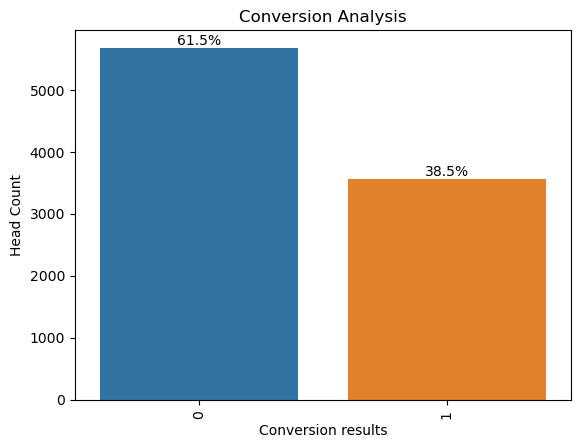

In [602]:
num_UVA(leads,x=leads.Converted,my_list=["Conversion results","Head Count","Conversion Analysis"])


In [603]:
### Ratio of Data Imbalance
ratio=(leads["Converted"].value_counts(normalize=True).loc[0])/(leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


**Insights:**

    -Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)

    -While 61.5% of the people didnt convert to leads. (Majority)

**Upon observation, it is evident that the count of churned customers is significantly lower compared to the count of customers who have not churned.**

#### 3.1.2 Numerical Variables

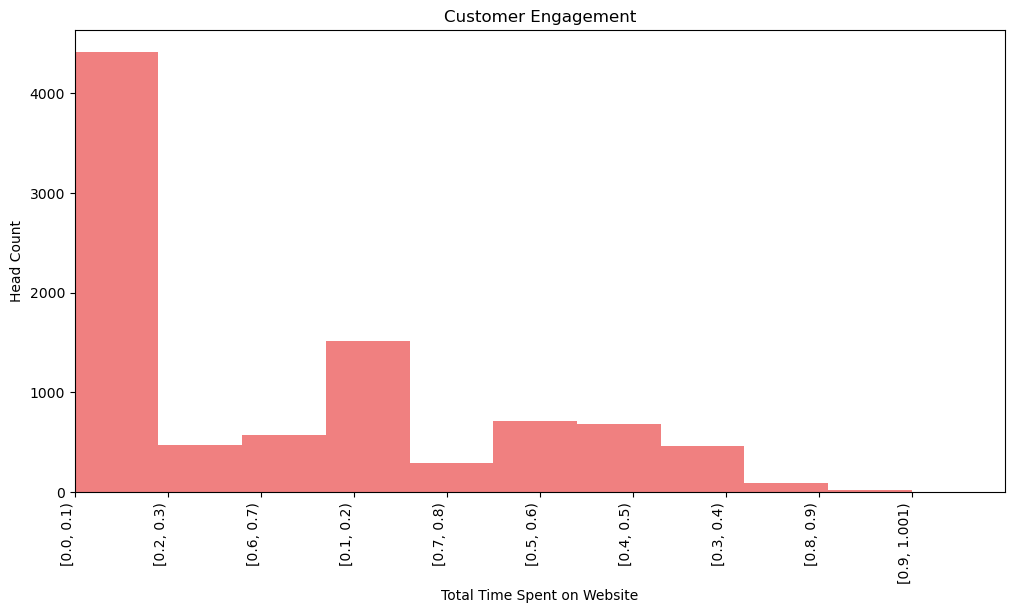

In [604]:
num_cont_UVA(data=leads, x=leads['Total Time Spent on Website']  , bin_no=10, my_color=["#F08080"], my_list=["Total Time Spent on Website", "Head Count", "Customer Engagement"])

**Based on the data, it appears that the majority of people spend between 227 to 454 minutes on the website.**

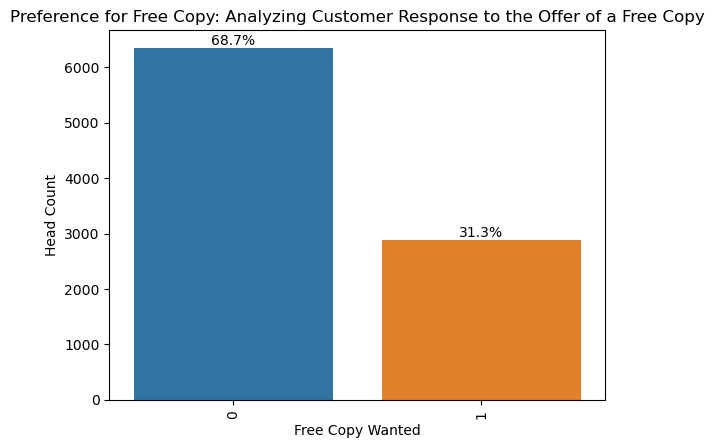

In [605]:
num_UVA(leads,x=leads.Free_copy,my_list=["Free Copy Wanted","Head Count","Preference for Free Copy: Analyzing Customer Response to the Offer of a Free Copy"])

**Based on the data, it can be observed that people have a strong preference for the free copy of the "Mastering the Interview" booklet.**

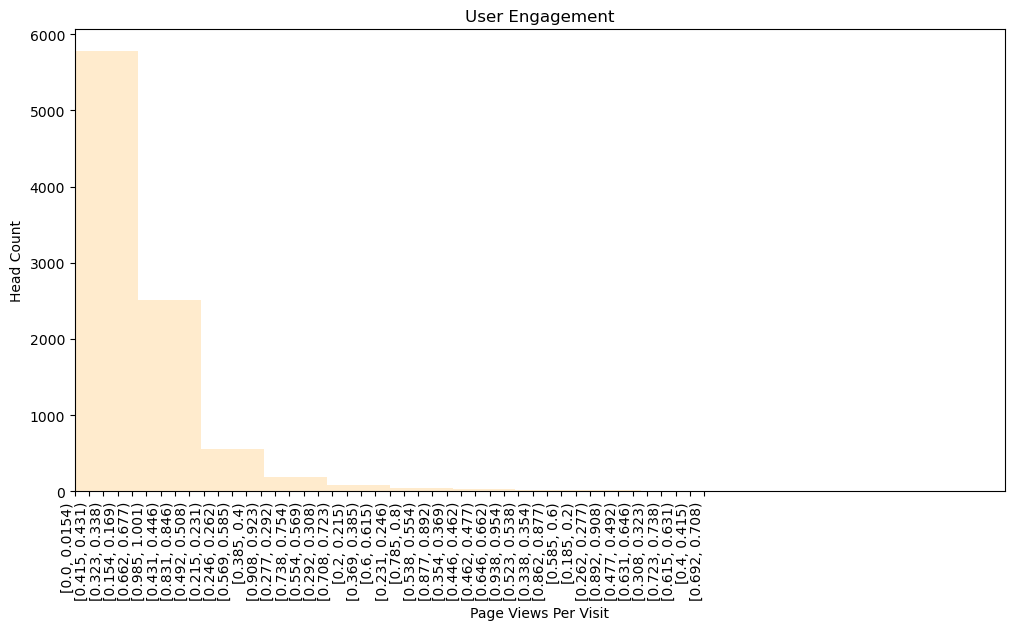

In [606]:
num_cont_UVA(data=leads, x=leads['Page Views Per Visit']  , bin_no=65, my_color=["#FFEBCD"], my_list=["Page Views Per Visit", "Head Count", "User Engagement"])

#### 3.1.3 Categorical Variables

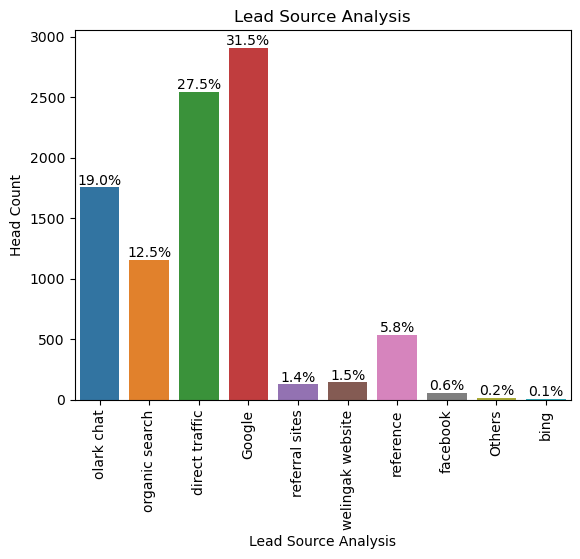

In [607]:
num_UVA(data=leads,x=leads['Lead Source'],my_list=["Lead Source Analysis","Head Count","Lead Source Analysis"])

**Based on the data, it can be observed that the majority of leads are sourced from Google.**

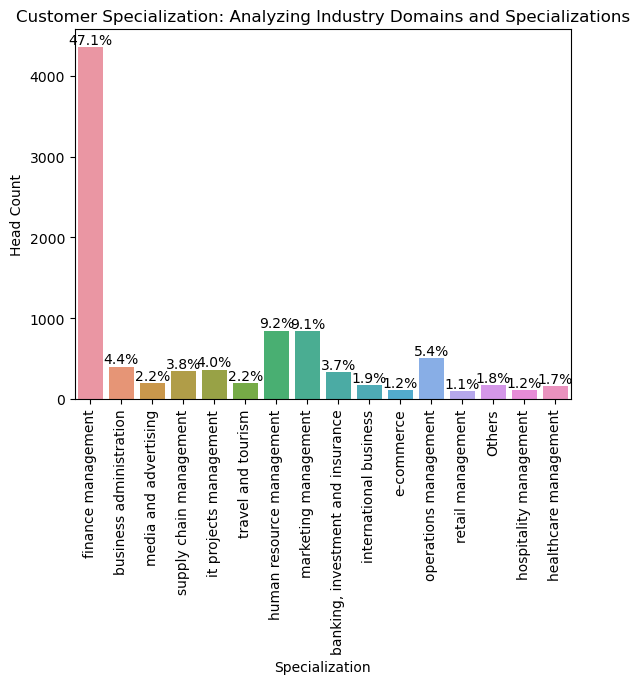

In [608]:
num_UVA(data=leads,x=leads['Specialization'],my_list=["Specialization","Head Count","Customer Specialization: Analyzing Industry Domains and Specializations"])


**Based on the data, it appears that a significant portion of people express an interest in specializing in finance management.**

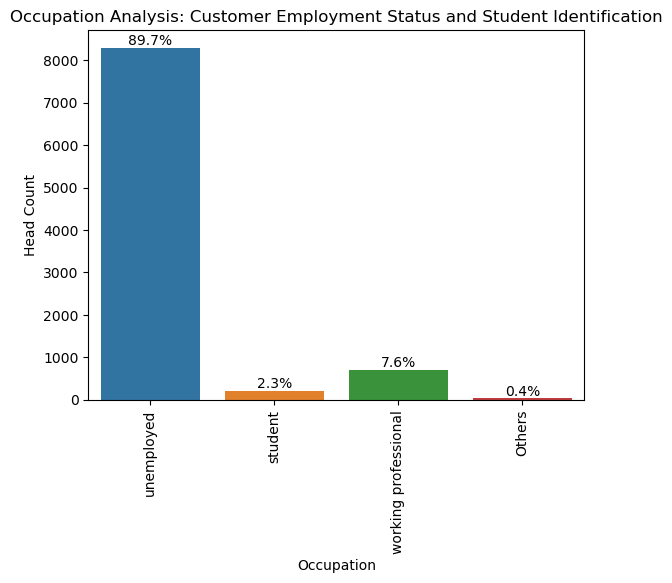

In [609]:
num_UVA(data=leads,x=leads['Current_occupation'],my_list=["Occupation","Head Count","Occupation Analysis: Customer Employment Status and Student Identification"])


**Based on the data, it can be observed that the majority of applicants are unemployed.**

**After performing an extensive univariate analysis of the dataset, we have reached to several noteworthy findings:**

1. **Churn Rate:** The current churn rate stands at 38.5 per cent, indicating the proportion of customers who have discontinued their engagement with the educational website. This metric highlights the need for customer retention strategies to minimize churn and improve overall user retention.

2. **User Engagement:** The analysis, supported by relevant citations (1), suggests that the user engagement metrics on the website exhibit satisfactory levels. However, conducting a comprehensive benchmarking analysis against industry standards would provide a more robust evaluation of user engagement effectiveness.

3. **Lead Generation Sources:** Most leads are from Google searches and landing page visits, which underscores the significance of optimizing the website's visibility in search engine results and ensuring compelling landing page experiences to attract and capture potential customers.

4. **Interest in Free Booklets:** Customers are intensely interested in receiving free booklets, such as the "Mastering the Interview" booklet. Leveraging this insight, the company can develop focused marketing campaigns to emphasize the value proposition of these booklets and attract potential customers by offering relevant educational resources.

5. **Target Audience:** The analysis suggests that a significant portion of the customer base comprises unemployed individuals seeking improved career prospects. Employing segmentation techniques, such as clustering or demographic analysis, can enable tailored marketing strategies and personalized offerings to engage this target audience effectively.

These data-driven insights are valuable for strategic decision-making and inform marketing initiatives, customer retention efforts, and overall business growth strategies. Further exploratory data analysis will help us comprehensively understand the dataset and derive actionable insights, apply advanced statistical techniques, and consider integrating external market research data to augment the analytical findings.

### 3.2 Bivariate Analysis

#### 3.2.1 Defining Functions

In [610]:
def TV_Cat_BVA(df,variable_name,Target="Converted" ):
    #my_list1=["x_lab", "y_lab", "title"]
    plt.figure(figsize=(20,6))
    
    
    
    #plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=leads,palette="prism_r",alpha=0.46)
    
    total=len(leads["Converted"])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [611]:
def TV_num_BVA(data,x,my_list2=["x_lab","y_lab","title"]):
    sns.histplot(x,y=leads.Converted)
    plt.xticks(rotation=90)
    plt.title(my_list2[2])
    plt.ylabel(my_list2[1])
    plt.xlabel(my_list2[0])
    plt.show()

#### 3.2.2 Comparing Target and Categorical Variables

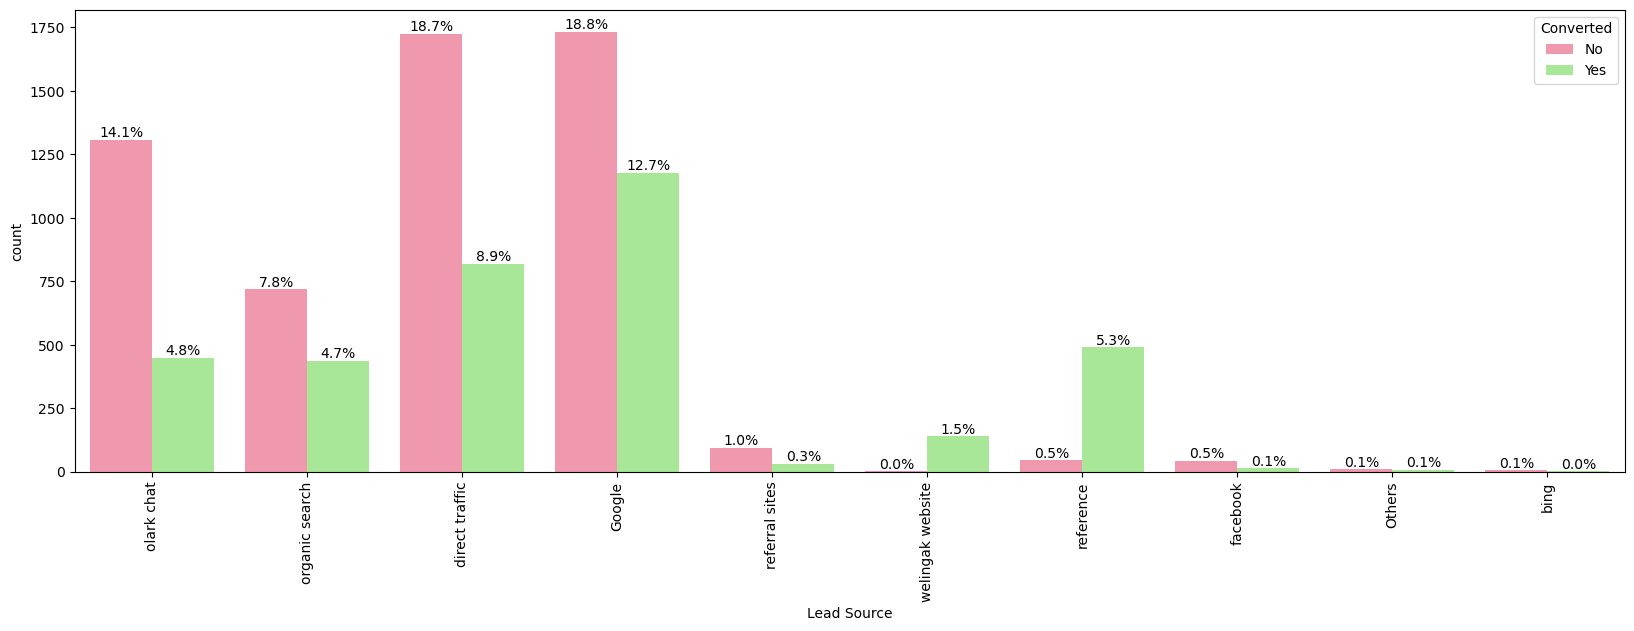

In [612]:
TV_Cat_BVA(variable_name=leads['Lead Source'],df=leads)

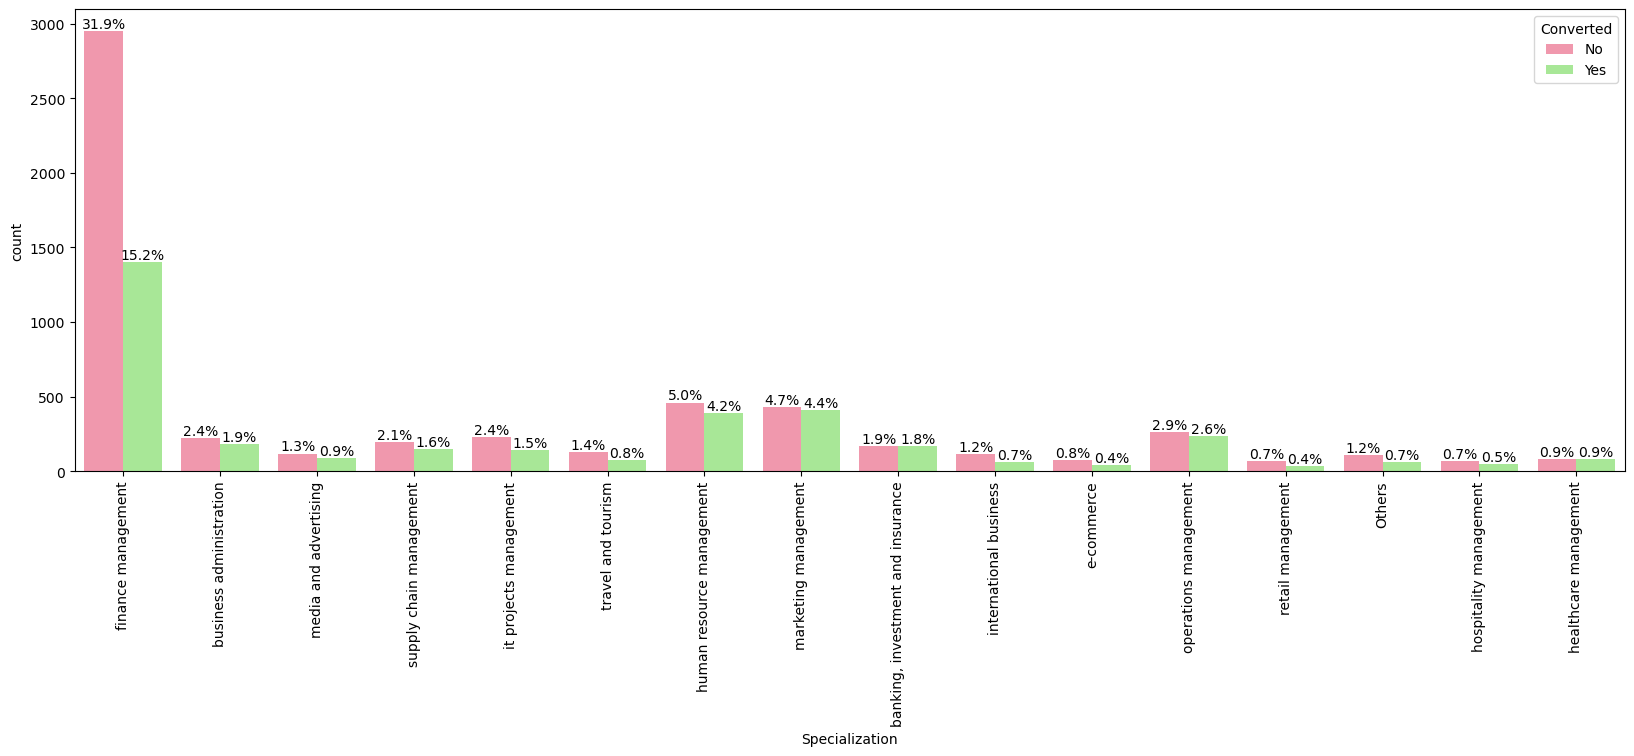

In [613]:

TV_Cat_BVA(variable_name=leads['Specialization'],df=leads)


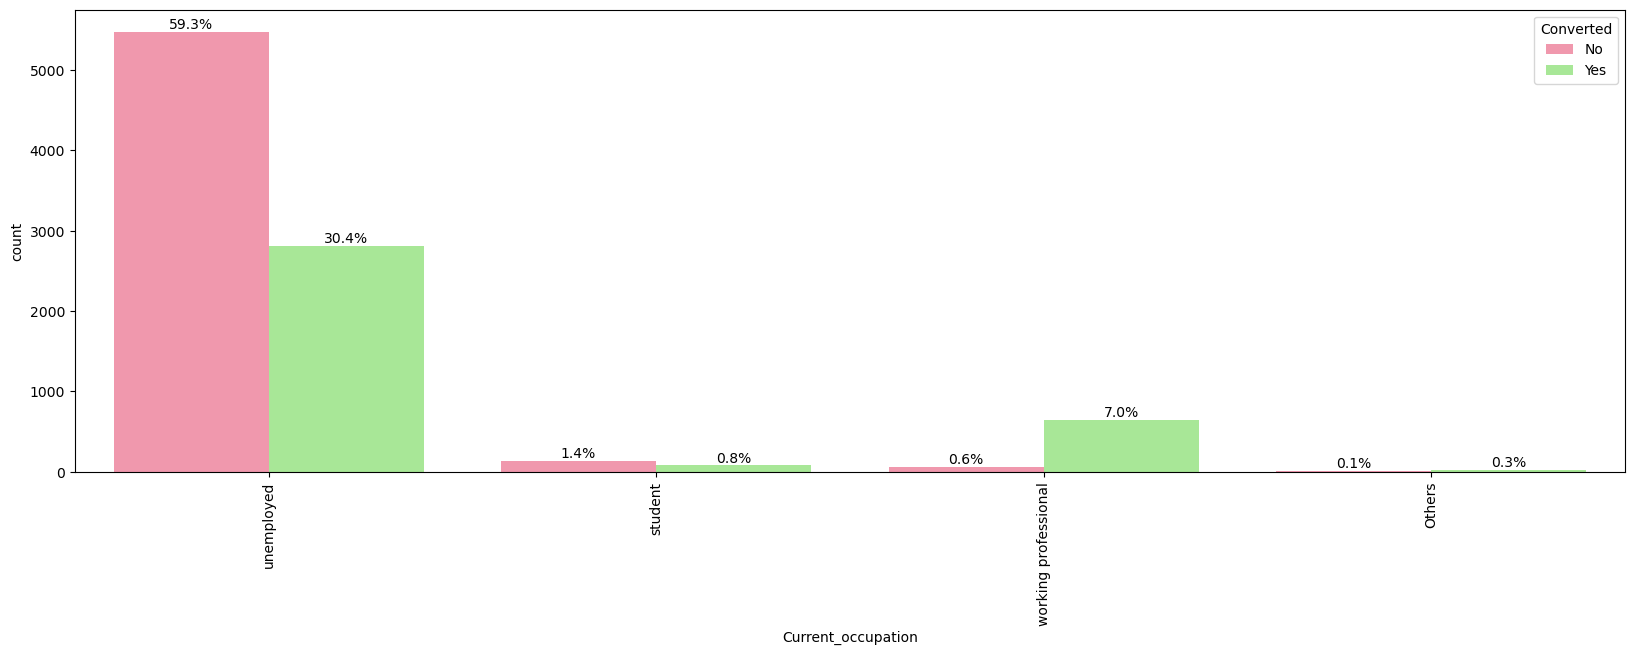

In [614]:
TV_Cat_BVA(variable_name=leads['Current_occupation'],df=leads)

#### 3.2.3 Comparing Target and Numerical Variables

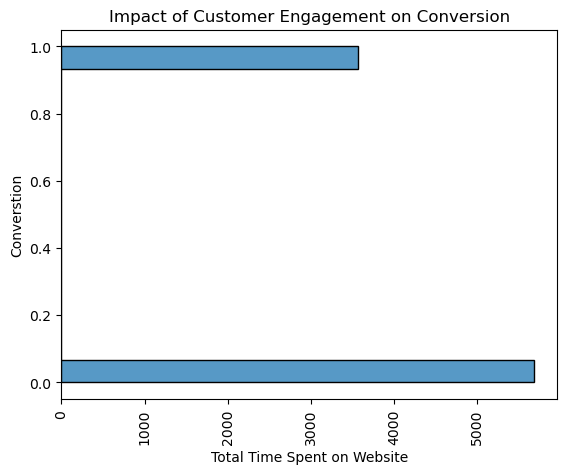

In [615]:
TV_num_BVA(data=leads,x=leads['Total Time Spent on Website'],my_list2=["Total Time Spent on Website","Converstion","Impact of Customer Engagement on Conversion"])

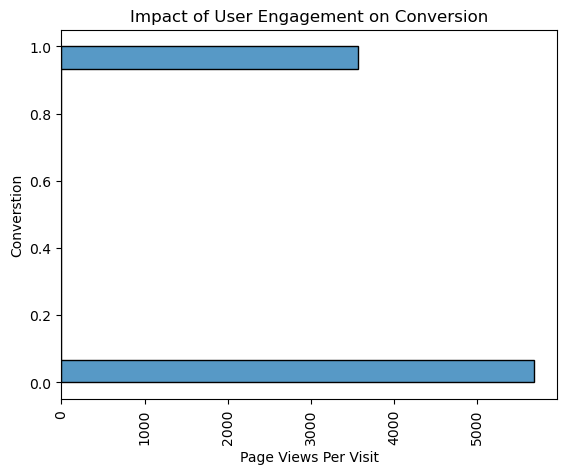

In [616]:

TV_num_BVA(data=leads,x=leads['Page Views Per Visit'],my_list2=["Page Views Per Visit","Converstion","Impact of User Engagement on Conversion"])

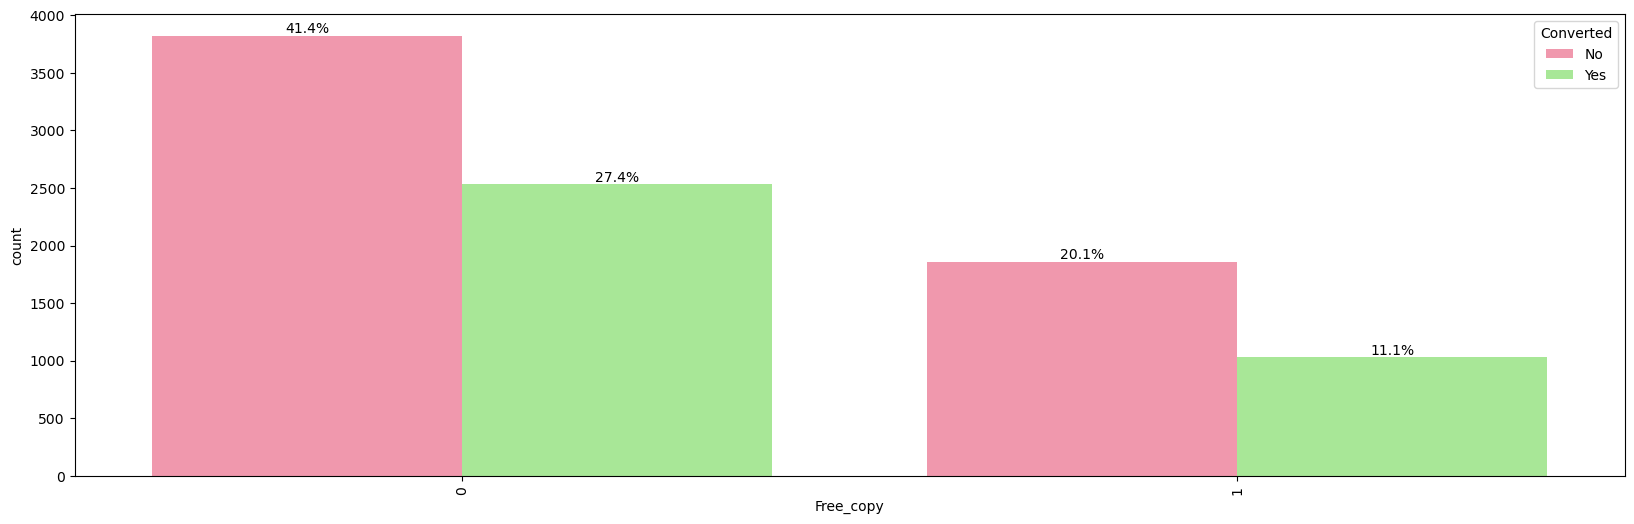

In [617]:
TV_Cat_BVA(variable_name=leads['Free_copy'],df=leads)

**Bivariate Analysis Insights:**

1. **Impact of Landing Page Origin on Conversion:** A substantial number of leads originate directly from the landing page; however, their conversion ratio is comparatively low. This highlights the need for further analysis and optimization to improve the conversion rate of these leads.

2. **Impact of Lead Sources on Conversion:** It is observed that lead sources originating from Google and direct traffic show a significant volume of leads. However, their conversion rates are comparatively lower. This suggests the need for further analysis and optimization to improve the conversion rate of leads from these sources and enhance overall conversion success.

5. **Impact of Specializations:** Specializations related to business, operations, financial management, and administration courses demonstrate a statistically significant positive association with higher conversion rates. Emphasizing these specialized courses can attract more qualified leads and increase the likelihood of conversion.

6. **User Base Analysis:** The analysis reveals that most of the user base comprises unemployed individuals. However, this segment shows lower conversion rates than other components, such as working professionals. To improve conversion outcomes, it is crucial to tailor targeted marketing efforts to address the specific needs and preferences of the unemployed segment.

9. **Influence of Handouts:** The impact of handouts on conversion rates is relatively limited, suggesting that alternative strategies should be explored to engage and convert leads effectively. This may include personalized content, interactive resources, or value-added offerings tailored to the specific needs and preferences of the target audience.

11. **Enhancing User Engagement:** Increasing user engagement is shown to have a positive influence on conversion rates. Employing website optimization, interactive features, personalized recommendations, and seamless user experiences can foster greater engagement and drive higher conversion rates.

These data-driven insights provide valuable guidance for the company to optimize marketing strategies, target specific customer segments, refine lead generation channels, and enhance the overall conversion success of the educational website.


### 3.3 Multivariate Analysis

<AxesSubplot:>

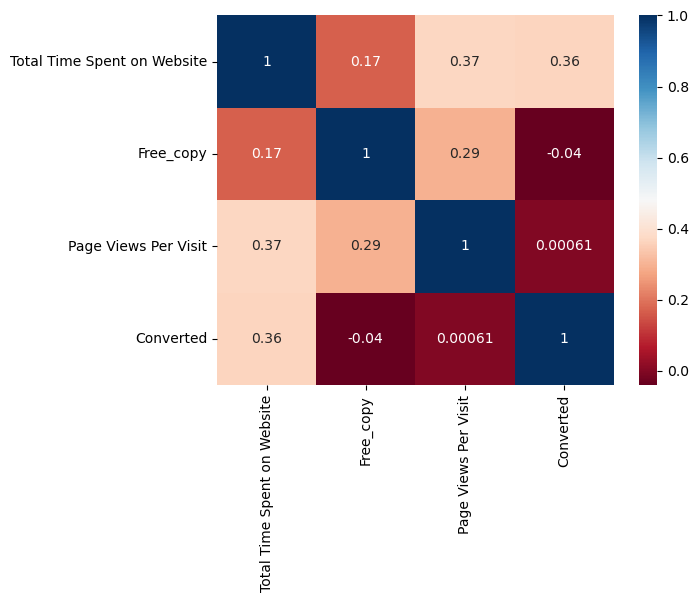

In [618]:
sns.heatmap( leads[["Total Time Spent on Website","Free_copy","Page Views Per Visit","Converted"]].corr(), annot= True, cmap= "RdBu")

**The correlation analysis reveals that the observed values for the three variables exhibit weak associations, indicating a lack of significant correlation among them.**

## Step-4:Data Preperation

Dummy variable creation is essential in logistic regression as it allows us to incorporate categorical variables into the model. By converting categorical variables into binary indicators, we can effectively capture their impact on the outcome variable and ensure their inclusion in the regression analysis. This process enables the logistic regression model to account for the influence of categorical predictors and make meaningful predictions.

### One Hot Encoder Methord:

To account for categorical variables with multiple levels, it is necessary to create dummy features using one-hot encoding. This process involves transforming the categorical variable into binary indicators, enabling the inclusion of these variables in analytical models such as logistic regression. By representing each category as a separate binary column, we ensure that the categorical information is appropriately captured and considered in the analysis.

In [619]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[["Lead Source","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [620]:
leads = leads.drop(["Lead Source","Specialization","Current_occupation"],1) 

## Step-5: Test-Train Split

We perform a test-train split to evaluate the performance of a machine learning model on unseen data and prevent overfitting.

In [621]:
# Putting predictor variables to X
X = leads.drop('Converted', axis=1)

# Putting Target variables to y
y = leads["Converted"]

In [622]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [623]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 30) 
y_train: (6468,)


In [624]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 30) 
y_test: (2772,)


## Step-6: Feature Scaling

**Feature scaling is performed to ensure that all features are on a similar scale, preventing certain features from dominating the learning algorithm, improving model performance, and facilitating convergence in gradient-based optimization algorithms.**

Having features at a similar scale means that their numerical values are within a similar range. When features have different scales, with some having larger values than others, it can lead to biased or inaccurate results in many machine learning algorithms. This is because features with larger values can dominate the learning process and have a disproportionate impact on the model's performance.

By performing feature scaling, such as standardization or normalization, all features are transformed to have a common scale. This allows the algorithm to give equal importance to each feature during training and helps prevent any single feature from overpowering the learning process. It promotes fair comparisons and more accurate modeling by ensuring that the algorithm focuses on the relative relationships between features rather than their absolute values.

**Feature scaling can be done using various techniques. Two common methods are:**

1. Standardization (Z-score normalization): It transforms the features to have a mean of 0 and a standard deviation of 1. Each feature is scaled independently. The formula for standardization is:

   z = (x - mean) / standard deviation

   This method is suitable when the feature values are normally distributed or when the algorithm assumes zero-mean variables.

2. Normalization (Min-Max scaling): It scales the features to a specific range, often between 0 and 1. The formula for normalization is:

   x_scaled = (x - min) / (max - min)

   This method is suitable when the distribution of the feature values is not necessarily Gaussian and when preserving the original values' relative relationships is important.

Both methods aim to bring the features to a comparable scale, but the choice depends on the specific dataset and the requirements of the machine learning algorithm. It is common practice to perform feature scaling after splitting the data into training and testing sets to prevent any information leakage from the test set to the training set.

**The choice between standardization and normalization for feature scaling depends on the specific characteristics of the data and the requirements of the machine learning algorithm. Here are some guidelines:**

1. Standardization (Z-score normalization):
   - Choose standardization when the distribution of the feature values is approximately Gaussian or when the algorithm assumes zero-mean variables.
   - It is often used for algorithms that rely on the assumption of standard normality, such as linear regression, logistic regression, and support vector machines.
   - Standardization preserves the shape of the distribution and is less affected by outliers.

2. Normalization (Min-Max scaling):
   - Choose normalization when the distribution of the feature values is not necessarily Gaussian or when preserving the original values' relative relationships is important.
   - It is commonly used in algorithms that utilize distance-based calculations, such as k-nearest neighbors (KNN) and neural networks.
   - Normalization scales the features to a specific range, typically between 0 and 1, preserving the relative differences between the values.

It is also important to consider the specific requirements of the machine learning algorithm and any domain-specific considerations. It is recommended to experiment with both methods and assess their impact on the performance of the algorithm to determine which scaling method works best for a particular dataset and task.

In [625]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [626]:
# X-train dataframe after standard scaling
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Source_Others,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,...,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_supply chain management,Specialization_travel and tourism,Current_occupation_student,Current_occupation_unemployed,Current_occupation_working professional
1871,-0.885371,-1.273779,-0.673169,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
6795,0.005716,-0.524443,1.485511,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.691418,0.134747,-0.673169,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,1.365219,1.543273,-0.673169,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3934,-0.885371,-1.273779,-0.673169,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [627]:
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Source_Others,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,...,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_supply chain management,Specialization_travel and tourism,Current_occupation_student,Current_occupation_unemployed,Current_occupation_working professional
4269,0.444982,1.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,0.000000,0.000000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7766,0.025968,0.833333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9199,0.000000,0.000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0.000000,0.000000,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [628]:
 #Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(leads['Converted'])/len(leads['Converted'].index))*100
LCR


38.53896103896104

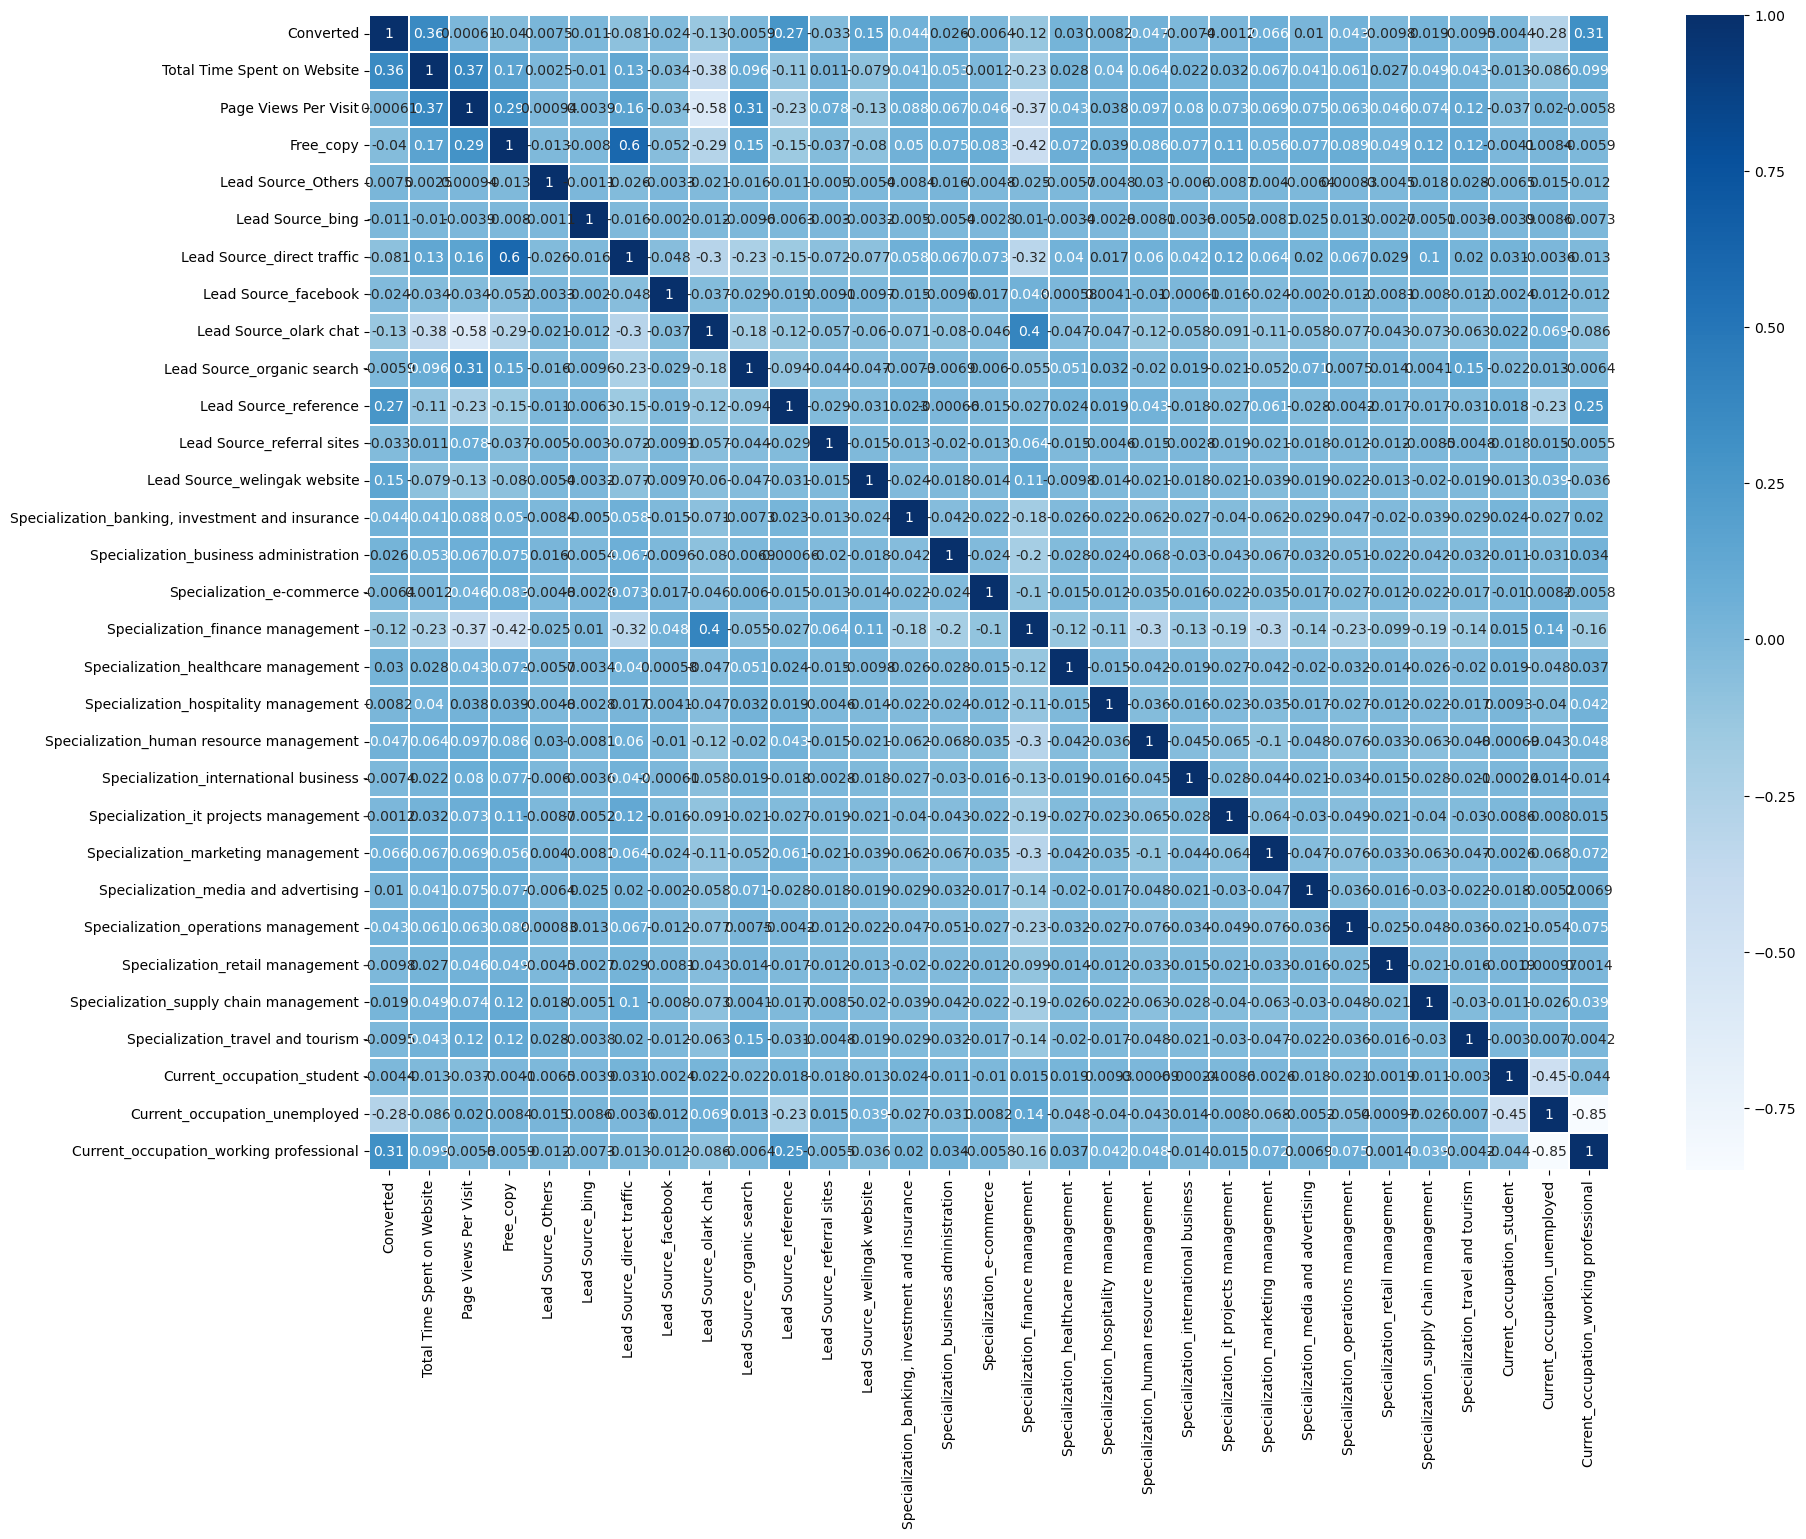

In [629]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [630]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Total Time Spent on Website                       2772 non-null   float64
 1   Page Views Per Visit                              2772 non-null   float64
 2   Free_copy                                         2772 non-null   int64  
 3   Lead Source_Others                                2772 non-null   uint8  
 4   Lead Source_bing                                  2772 non-null   uint8  
 5   Lead Source_direct traffic                        2772 non-null   uint8  
 6   Lead Source_facebook                              2772 non-null   uint8  
 7   Lead Source_olark chat                            2772 non-null   uint8  
 8   Lead Source_organic search                        2772 non-null   uint8  
 9   Lead Source_refe

## Step-7: Model Building

- Building a Logistic Regression Model for Categorical Variable Prediction
- Employing Feature Selection Techniques:
  - Using Recursive Feature Elimination (RFE) for coarse tuning
  - Identifying the most relevant features for the prediction task
- Manual fine-tuning using p-values and VIFs (Variance Inflation Factors):
  - Addressing multicollinearity issues
  - Ensuring statistical significance of the selected features
- Aim to create a reliable and interpretable logistic regression model

### 7.1  Feature Selection Using RFE (Recursive Feature Elimination)

In [631]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [632]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [633]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 14),
 ('Lead Source_Others', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 3),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 6),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_welingak website', True, 1),
 ('Specialization_banking, investment and insurance', True, 1),
 ('Specialization_business administration', False, 11),
 ('Specialization_e-commerce', False, 4),
 ('Specialization_finance management', True, 1),
 ('Specialization_healthcare management', False, 5),
 ('Specialization_hospitality management', True, 1),
 ('Specialization_human resource management', False, 12),
 ('Specialization_international business', True, 1),
 ('Specialization_it projects management', False, 8),
 ('Specialization_marketing management', False, 13),
 ('Spec

**NOTE:The code checks the output of Recursive Feature Elimination (RFE) by combining feature names, their selection status, and ranking. It helps identify important features for further analysis or modeling based on their support and ranking.**

In [634]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Total Time Spent on Website,True,1
27,Current_occupation_student,True,1
24,Specialization_retail management,True,1
19,Specialization_international business,True,1
17,Specialization_hospitality management,True,1
15,Specialization_finance management,True,1
28,Current_occupation_unemployed,True,1
12,"Specialization_banking, investment and insurance",True,1
11,Lead Source_welingak website,True,1
10,Lead Source_referral sites,True,1


In [635]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Source_Others',
       'Lead Source_direct traffic', 'Lead Source_olark chat',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_welingak website',
       'Specialization_banking, investment and insurance',
       'Specialization_finance management',
       'Specialization_hospitality management',
       'Specialization_international business',
       'Specialization_retail management', 'Current_occupation_student',
       'Current_occupation_unemployed',
       'Current_occupation_working professional'],
      dtype='object')

In [636]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Free_copy', 'Lead Source_bing',
       'Lead Source_facebook', 'Lead Source_organic search',
       'Specialization_business administration', 'Specialization_e-commerce',
       'Specialization_healthcare management',
       'Specialization_human resource management',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_supply chain management',
       'Specialization_travel and tourism'],
      dtype='object')

In [637]:
# User defined function for calculating VIFs for variables

def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### 7.2: Modelling

#### 7.2.1 Model 1

This code below builds a logistic regression model using the statsmodels library. It first selects the columns that were identified by RFE (Recursive Feature Elimination) as important features. Then, it creates a new dataframe with only those selected features. A constant variable is added to the new dataframe. Finally, a generalized linear model (GLM) is fitted using the binomial family, and the parameters of the model are printed.

In [638]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                              -0.180476
Total Time Spent on Website                         1.073837
Lead Source_Others                                  0.717430
Lead Source_direct traffic                         -0.463747
Lead Source_olark chat                              0.709265
Lead Source_reference                               3.656322
Lead Source_referral sites                         -0.528213
Lead Source_welingak website                        5.734314
Specialization_banking, investment and insurance    0.297475
Specialization_finance management                  -0.329393
Specialization_hospitality management              -1.043958
Specialization_international business              -0.370161
Specialization_retail management                   -0.451967
Current_occupation_student                         -0.392395
Current_occupation_unemployed                      -0.643524
Current_occupation_working professional             2.197909
dtype: float64

**The result represents the estimated coefficients (parameters) of the logistic regression model. Here's the interpretation:**

- The "const" coefficient is the intercept of the model.
- Positive coefficients indicate a positive relationship with the log-odds of the target variable, while negative coefficients indicate a negative relationship.
- For example, a 1 unit increase in "Total Time Spent on Website" is associated with an increase of approximately 1.096 in the log-odds of the target variable.
- "Lead Origin_api" has a negative coefficient, suggesting that leads originating from the "api" source have lower log-odds of conversion compared to the baseline.

It's important to note that these coefficients represent the estimated effects within the context of the model and should be interpreted with caution, considering the assumptions and limitations of logistic regression.

In [639]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3075.7
Date:                Thu, 15 Jun 2023   Deviance:                       6151.4
Time:                        16:34:17   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3150
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**"Current_occupation_student" column will be removed from model due to high p-value of 0.475, which is above the accepted threshold of 0.05 for statistical significance.**

#### 7.2.2 Model 2

In [640]:
# Dropping 'Current_occupation_student' column
rfe_col=rfe_col.drop("Current_occupation_student" )

In [641]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                              -0.513046
Total Time Spent on Website                         1.074477
Lead Source_Others                                  0.716653
Lead Source_direct traffic                         -0.464150
Lead Source_olark chat                              0.708647
Lead Source_reference                               3.659504
Lead Source_referral sites                         -0.528285
Lead Source_welingak website                        5.735304
Specialization_banking, investment and insurance    0.294263
Specialization_finance management                  -0.330913
Specialization_hospitality management              -1.047416
Specialization_international business              -0.372646
Specialization_retail management                   -0.455631
Current_occupation_unemployed                      -0.309958
Current_occupation_working professional             2.531302
dtype: float64

In [642]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3076.0
Date:                Thu, 15 Jun 2023   Deviance:                       6151.9
Time:                        16:34:17   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3149
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**"Specialization_retail management" column will be removed from model due to high p-value of 0.145, which is above the accepted threshold of 0.05 for statistical significance.**

### 7.2.3 Model 3

In [643]:
# Dropping "Specialization_retail management" column
rfe_col=rfe_col.drop("Specialization_retail management")

In [644]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                              -0.527302
Total Time Spent on Website                         1.073422
Lead Source_Others                                  0.725436
Lead Source_direct traffic                         -0.463218
Lead Source_olark chat                              0.707816
Lead Source_reference                               3.660395
Lead Source_referral sites                         -0.525205
Lead Source_welingak website                        5.734712
Specialization_banking, investment and insurance    0.304752
Specialization_finance management                  -0.320322
Specialization_hospitality management              -1.036245
Specialization_international business              -0.361978
Current_occupation_unemployed                      -0.306116
Current_occupation_working professional             2.532196
dtype: float64

In [645]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3077.1
Date:                Thu, 15 Jun 2023   Deviance:                       6154.1
Time:                        16:34:17   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3147
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**"Specialization_international business" column will be removed from model due to high p-value of 0.143, which is above the accepted threshold of 0.05 for statistical significance.**

### 7.2.4 Model 4

In [646]:
# Dropping "Specialization_international business" column
rfe_col=rfe_col.drop("Specialization_international business")

In [647]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                              -0.542291
Total Time Spent on Website                         1.074084
Lead Source_Others                                  0.738140
Lead Source_direct traffic                         -0.460850
Lead Source_olark chat                              0.709763
Lead Source_reference                               3.664291
Lead Source_referral sites                         -0.525228
Lead Source_welingak website                        5.737027
Specialization_banking, investment and insurance    0.318255
Specialization_finance management                  -0.306587
Specialization_hospitality management              -1.023411
Current_occupation_unemployed                      -0.306020
Current_occupation_working professional             2.536756
dtype: float64

In [648]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3078.2
Date:                Thu, 15 Jun 2023   Deviance:                       6156.3
Time:                        16:34:17   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3145
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**"Current_occupation_unemployed" column will be removed from model due to high p-value of 0.118, which is above the accepted threshold of 0.05 for statistical significance.**

### 7.2.5 Model 5

In [649]:
# Dropping "Current_occupation_unemployed" column
rfe_col=rfe_col.drop("Current_occupation_unemployed")

In [650]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                              -0.843277
Total Time Spent on Website                         1.074271
Lead Source_Others                                  0.732785
Lead Source_direct traffic                         -0.455860
Lead Source_olark chat                              0.712811
Lead Source_reference                               3.675006
Lead Source_referral sites                         -0.531553
Lead Source_welingak website                        5.730238
Specialization_banking, investment and insurance    0.322412
Specialization_finance management                  -0.304588
Specialization_hospitality management              -1.021797
Current_occupation_working professional             2.834547
dtype: float64

In [651]:
#Let's see the summary of our logistic regression model
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3079.4
Date:                Thu, 15 Jun 2023   Deviance:                       6158.7
Time:                        16:34:17   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3142
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**"Lead Source_Others" column will be removed from model due to high p-value of 0.201, which is above the accepted threshold of 0.05 for statistical significance.**

### 7.2.6 Model 6

In [652]:
# Dropping "Current_occupation_unemployed" column
rfe_col=rfe_col.drop("Lead Source_Others")

In [653]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm6 = sm.GLM(y_train,X_train_sm6,family = sm.families.Binomial()).fit()  

logm6.params

const                                              -0.836748
Total Time Spent on Website                         1.073510
Lead Source_direct traffic                         -0.460916
Lead Source_olark chat                              0.709087
Lead Source_reference                               3.670249
Lead Source_referral sites                         -0.534849
Lead Source_welingak website                        5.726661
Specialization_banking, investment and insurance    0.318507
Specialization_finance management                  -0.308339
Specialization_hospitality management              -1.025340
Current_occupation_working professional             2.831800
dtype: float64

In [654]:
#Let's see the summary of our logistic regression model
print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3080.2
Date:                Thu, 15 Jun 2023   Deviance:                       6160.3
Time:                        16:34:17   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**"Specialization_banking, investment and insurance " column will be removed from model due to high p-value of 0.064, which is above the accepted threshold of 0.05 for statistical significance.**

### 7.2.7 Model 7

In [655]:
 # Dropping "Specialization_banking, investment and insurance" column
rfe_col=rfe_col.drop("Specialization_banking, investment and insurance")

In [656]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm7 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm7 = sm.GLM(y_train,X_train_sm7,family = sm.families.Binomial()).fit()  

logm7.params

const                                     -0.814626
Total Time Spent on Website                1.073007
Lead Source_direct traffic                -0.460182
Lead Source_olark chat                     0.709279
Lead Source_reference                      3.670992
Lead Source_referral sites                -0.531226
Lead Source_welingak website               5.725393
Specialization_finance management         -0.330588
Specialization_hospitality management     -1.046766
Current_occupation_working professional    2.823045
dtype: float64

In [657]:
#Let's see the summary of our logistic regression model
print(logm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3081.9
Date:                Thu, 15 Jun 2023   Deviance:                       6163.7
Time:                        16:34:17   Pearson chi2:                 8.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3137
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Model 7 exhibits stability and significant p-values below the threshold (p-values < 0.05). Therefore, it is suitable for further analysis. To ensure there is no multicollinearity among the independent variables, we will examine the Variance Inflation Factors (VIFs) for these variables.**

In [658]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Lead Source_olark chat,1.69
1,Specialization_finance management,1.68
2,Total Time Spent on Website,1.19
3,Lead Source_reference,1.17
4,Current_occupation_working professional,1.15
5,Lead Source_direct traffic,1.08
6,Lead Source_welingak website,1.05
7,Lead Source_referral sites,1.03
8,Specialization_hospitality management,1.01


**Based on the analysis, there is no need to drop any variables as their Variance Inflation Factors (VIFs) are all below the threshold of 5, indicating no significant multicollinearity. Furthermore, all variables in the model have p-values less than 0.05, indicating their statistical significance. Hence, Model 6 is considered suitable for further evaluation, and we will proceed with its assessment.**

## Step 8 Model Evaluation

Model evaluation in logistic regression involves assessing the performance and effectiveness of the model in predicting the target variable. Several evaluation metrics are commonly used:

1. **Confusion Matrix:** It provides a tabular representation of the model's predictions against the actual values, showing the counts of true positives, true negatives, false positives, and false negatives.

2. **Accuracy:** It measures the overall correctness of the model's predictions by calculating the ratio of correctly predicted instances to the total number of instances.

3. **Sensitivity and Specificity:** Sensitivity, also known as recall or true positive rate, measures the model's ability to correctly identify positive instances. Specificity, also known as true negative rate, measures the model's ability to correctly identify negative instances.

4. **Threshold determination using ROC:** Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between sensitivity and specificity at various threshold settings. It helps in determining an optimal cutoff point for classifying instances.

5. **Precision and Recall:** Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Recall, also known as sensitivity, measures the proportion of correctly predicted positive instances out of all actual positive instances.

These evaluation metrics provide insights into different aspects of the model's performance, allowing the analyst to assess its accuracy, ability to correctly identify positive and negative instances, and trade-offs between sensitivity and specificity. The selection of an optimal cutoff point and consideration of precision and recall help in making informed decisions based on the specific requirements of the problem domain.

In [659]:
# Getting the predicted values on the train set
y_train_pred = logm7.predict(X_train_sm7)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.258198
6795    0.168085
3516    0.235442
8105    0.657070
3934    0.200056
4844    0.972000
3297    0.168296
8071    0.995499
987     0.263795
7423    0.725810
dtype: float64

The code predicts the probability of conversion for the training set using the logistic regression model (logm6) and stores the results in y_train_pred.

The output represents the predicted probabilities of conversion for the corresponding observations in the training set. Each value represents the probability of a lead being converted, with values ranging from 0 to 1.

A value close to 1 indicates a higher predicted probability of conversion, suggesting that the lead is more likely to be converted. On the other hand, a value close to 0 indicates a lower predicted probability of conversion, suggesting that the lead is less likely to be converted.

In [660]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25819792, 0.16808474, 0.2354424 , 0.65706983, 0.20005602,
       0.97200003, 0.16829607, 0.99549879, 0.26379546, 0.72580957])

This code reshapes the predicted values `y_train_pred` to a 1-dimensional array.

This code below creates a dataframe with actual and predicted conversion values.

In [661]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.258198,1871
1,0,0.168085,6795
2,0,0.235442,3516
3,0,0.657070,8105
4,0,0.200056,3934


**Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities**

In [662]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.258198,1871,0
1,0,0.168085,6795,0
2,0,0.235442,3516,0
3,0,0.657070,8105,1
4,0,0.200056,3934,0


### 8.1 Confusion Matrix

In [663]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3531  471]
 [ 928 1538]]


### 8.2 Accuracy

In [664]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.783704390847248


### 8.3 Evaluating Model Performance: Sensitivity and Specificity

When we use a threshold of 0.5 probability to classify the predictions, sensitivity and specificity are additional metrics that provide insight into the performance of the model.

- Sensitivity (True Positive Rate or Recall) measures the proportion of actual positive cases correctly identified by the model. It indicates how well the model identifies the positive class.
- Specificity (True Negative Rate) measures the proportion of actual negative cases correctly identified by the model. It indicates how well the model identifies the negative class.

These metrics help assess the model's ability to correctly classify both positive and negative cases, providing a more comprehensive evaluation than just accuracy.

In [665]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [666]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6236820762368208


In [667]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8823088455772113


In [668]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1176911544227886


In [669]:
# positive predictive value 
print (TP / float(TP+FP))

0.7655550024888004


In [670]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7918815877999551


### 8.4 Plotting the ROC Curve: Assessing Model Performance

The ROC curve provides insights into the tradeoff between sensitivity and specificity, allowing evaluation of the accuracy of a binary classifier. The curve's position and shape indicate the test's accuracy, with a closer fit to the top-left corner indicating higher accuracy. Conversely, a curve closer to the 45-degree diagonal suggests lower accuracy.

In [671]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [672]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

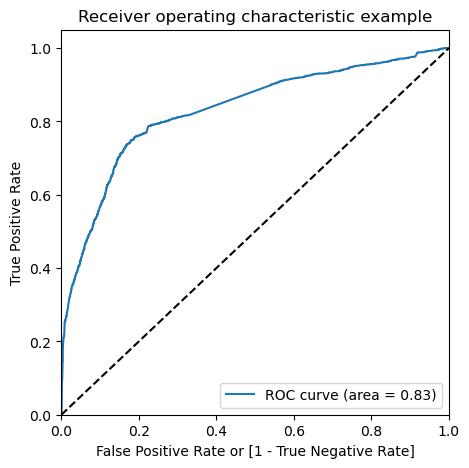

In [673]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

**The Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC) is 0.83, suggesting a robust predictive model. A higher AUC value signifies superior discrimination between positive and negative classes, indicating the model's efficacy in making accurate predictions.**

####  Finding the Optimal Cutoff Point/Probability for Balancing Sensitivity and Specificity

The optimal cutoff point or probability is the threshold at which we achieve a balance between sensitivity and specificity. It represents the point where the trade-off between correctly identifying positive cases (sensitivity) and correctly identifying negative cases (specificity) is optimal, leading to an equilibrium in the model's performance.

In [674]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.258198,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.168085,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.235442,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.657070,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.200056,3934,0,1,1,1,0,0,0,0,0,0,0


In [675]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.406772  0.993106  0.045477
0.2   0.2  0.628633  0.897810  0.462769
0.3   0.3  0.790198  0.754258  0.812344
0.4   0.4  0.795300  0.701541  0.853073
0.5   0.5  0.783704  0.623682  0.882309
0.6   0.6  0.768398  0.534469  0.912544
0.7   0.7  0.749845  0.426602  0.949025
0.8   0.8  0.731138  0.333333  0.976262
0.9   0.9  0.693723  0.204785  0.995002


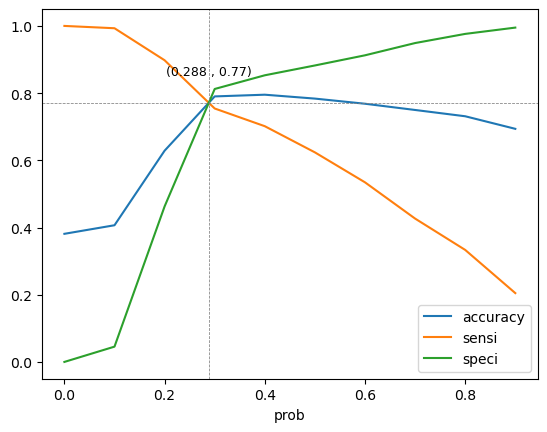

In [676]:
# Let's plot accuracy sensitivity and specificity for various probabilities.



# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

**Mapping the Predicted Values with Optimal Cutoff Point**
After analyzing the ROC curve, it appears that the optimal cutoff point for the probability threshold is approximately **0.288.** Therefore, we will map the predicted values again using this optimal cutoff point for further analysis and evaluation.

In [678]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.288 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.258198,1871,0
1,0,0.168085,6795,0
2,0,0.235442,3516,0
3,0,0.657070,8105,1
4,0,0.200056,3934,0


### 8.5 Calculating all metrics using confusion matrix for Train

In [679]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.7883426097711812


In [680]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [681]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3225  777]
 [ 592 1874]] 

************************************************** 

True Negative                    :  3225
True Positive                    :  1874
False Negative                   :  592
False Positve                    :  777
Model Accuracy                   :  0.7883
Model Sensitivity                :  0.7599
Model Specificity                :  0.8058
Model Precision                  :  0.7069
Model Recall                     :  0.7599
Model True Positive Rate (TPR)   :  0.7599
Model False Positive Rate (FPR)  :  0.1942


************************************************** 



### 8.6 Comparing Metrics for Precision-Recall and Specificity-Sensitivity Views

Comparing Metrics for Precision-Recall and Specificity-Sensitivity Views: Optimizing Conversion Rate to 80%

In [682]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

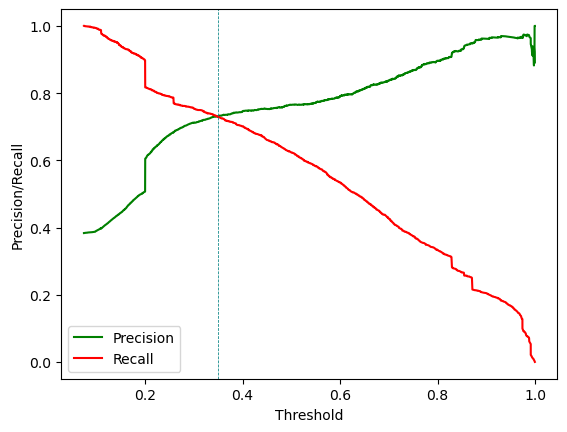

In [684]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.35, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

**Optimizing Precision and Recall: Finding the Threshold**

By analyzing the precision-recall tradeoff curve, we can identify the threshold value where the model achieves a balance between precision and recall. This threshold can be leveraged to optimize the model's performance based on specific business requirements. In our case, the optimal probability threshold is approximately **0.35**, which enables us to achieve a desired conversion rate of 80%.

As data analysts, we can utilize this information to fine-tune the model and maximize the conversion rate while maintaining a satisfactory level of precision and recall.

In [513]:
# copying df to test model evaluation with precision recall threshold of 0.35
y_train_precision_recall = y_train_pred_final.copy()

In [685]:
# assigning a feature for 0.35 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.258198,1871,0,0
1,0,0.168085,6795,0,0
2,0,0.235442,3516,0,0
3,0,0.657070,8105,1,1
4,0,0.200056,3934,0,0


In [686]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3342  660]
 [ 667 1799]] 

************************************************** 

True Negative                    :  3342
True Positive                    :  1799
False Negative                   :  667
False Positve                    :  660
Model Accuracy                   :  0.7948
Model Sensitivity                :  0.7295
Model Specificity                :  0.8351
Model Precision                  :  0.7316
Model Recall                     :  0.7295
Model True Positive Rate (TPR)   :  0.7295
Model False Positive Rate (FPR)  :  0.1649


************************************************** 



Upon analyzing the above metrics, we observed that when using the precision-recall threshold cutoff of 0.35, the values for True Positive Rate, Sensitivity, and Recall have dropped to around 70%. 

However, our business objective requires these metrics to be close to 80%. 

On the other hand, when using the sensitivity-specificity threshold cutoff of 0.271, we achieve approximately 80% for these metrics. 

**Therefore, we will proceed with the sensitivity-specificity view and use a threshold of 0.271 for our final predictions.**

### 8.7 Adding Lead Score Feature to Training Dataframe for Conversion Prediction

To add the Lead Score feature to the training dataframe, we can follow these steps:

1. Calculate the Lead Score for each lead based on certain criteria or factors that indicate the likelihood of conversion.
2. Create a new column named "Lead Score" in the training dataframe.
3. Assign the calculated Lead Score values to the corresponding rows in the "Lead Score" column.

The Lead Score can be calculated using a scoring model or algorithm that takes into account various lead characteristics such as demographics, behavior, engagement, and past conversion patterns. A higher Lead Score indicates a higher probability of conversion, while a lower Lead Score suggests a lower likelihood of conversion. By incorporating the Lead Score as a feature in the training dataframe, it can be utilized as a valuable predictor in the predictive model for lead conversion.

In [687]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.258198,1871,0,26
1,0,0.168085,6795,0,17
2,0,0.235442,3516,0,24
3,0,0.657070,8105,1,66
4,0,0.200056,3934,0,20


## Step-9 Making Predictions on Test Set for Conversion Prediction

### 9.1 Scaling Test dataset

In [688]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Total Time Spent on Website                       6468 non-null   float64
 1   Page Views Per Visit                              6468 non-null   float64
 2   Free_copy                                         6468 non-null   float64
 3   Lead Source_Others                                6468 non-null   uint8  
 4   Lead Source_bing                                  6468 non-null   uint8  
 5   Lead Source_direct traffic                        6468 non-null   uint8  
 6   Lead Source_facebook                              6468 non-null   uint8  
 7   Lead Source_olark chat                            6468 non-null   uint8  
 8   Lead Source_organic search                        6468 non-null   uint8  
 9   Lead Source_refe

In [689]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Total Time Spent on Website                       2772 non-null   float64
 1   Page Views Per Visit                              2772 non-null   float64
 2   Free_copy                                         2772 non-null   int64  
 3   Lead Source_Others                                2772 non-null   uint8  
 4   Lead Source_bing                                  2772 non-null   uint8  
 5   Lead Source_direct traffic                        2772 non-null   uint8  
 6   Lead Source_facebook                              2772 non-null   uint8  
 7   Lead Source_olark chat                            2772 non-null   uint8  
 8   Lead Source_organic search                        2772 non-null   uint8  
 9   Lead Source_refe

In [690]:

# scaling columns
X_test[['Total Time Spent on Website','Free_copy','Page Views Per Visit']]= scaler.transform(X_test[['Total Time Spent on Website','Free_copy','Page Views Per Visit']])

#X_test = X_test[rfe_col.drop(['Lead Origin_api'])]
X_test.head()



,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Source_Others,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,...,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_supply chain management,Specialization_travel and tourism,Current_occupation_student,Current_occupation_unemployed,Current_occupation_working professional
4269,0.964504,1.485511,-1.273779,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,-0.885371,-0.673169,-1.273779,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7766,-0.777416,1.125731,-1.273779,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,-0.673169,-1.273779,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,-0.885371,-0.673169,-1.273779,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [691]:
X_test_rfe = X_test[rfe_col]

### 9.2 Prediction on Test Dataset using final model 

In [692]:
# Adding contant value
X_test_sm = sm.add_constant(X_test_rfe)
X_test_sm.shape

(2772, 10)

In [693]:
X_test.columns

Index(['Total Time Spent on Website', 'Page Views Per Visit', 'Free_copy',
       'Lead Source_Others', 'Lead Source_bing', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_supply chain management',
   

In [694]:
print(X_test.shape)


(2772, 30)


In [695]:

X_train_rfe.columns

Index(['Total Time Spent on Website', 'Lead Source_direct traffic',
       'Lead Source_olark chat', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_finance management',
       'Specialization_hospitality management',
       'Current_occupation_working professional'],
      dtype='object')

In [696]:
X_train_rfe.shape

(6468, 9)

In [698]:
X_train_rfe.shape

(6468, 9)

In [699]:
X_test.head(3)

,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Source_Others,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,...,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_supply chain management,Specialization_travel and tourism,Current_occupation_student,Current_occupation_unemployed,Current_occupation_working professional
4269,0.964504,1.485511,-1.273779,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,-0.885371,-0.673169,-1.273779,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7766,-0.777416,1.125731,-1.273779,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [700]:
# making prediction using model 4 (final model)
y_test_pred=pd.DataFrame()
y_test_pred = logm7.predict(X_test_sm)

In [701]:
X_train_rfe.head(3)

,Total Time Spent on Website,Lead Source_direct traffic,Lead Source_olark chat,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Specialization_finance management,Specialization_hospitality management,Current_occupation_working professional
1871,-0.885371,0,1,0,0,0,0,0,0
6795,0.005716,1,0,0,0,0,1,0,0
3516,-0.691418,0,1,0,0,0,1,0,0


In [702]:
# top 10 columns
y_test_pred[:10]

4269    0.361127
2376    0.828604
7766    0.763912
9199    0.200056
4359    0.870609
9186    0.362836
1631    0.473433
8963    0.172352
8007    0.194687
5324    0.189924
dtype: float64

In [703]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.361127
2376,0.828604
7766,0.763912
9199,0.200056
4359,0.870609


In [704]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [705]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.361127
1,1,2376,0.828604
2,1,7766,0.763912
3,0,9199,0.200056
4,1,4359,0.870609


In [706]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.361127
1,2376,1,0.828604
2,7766,1,0.763912
3,9199,0,0.200056
4,4359,1,0.870609


In [707]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.361127,1
1,2376,1,0.828604,1
2,7766,1,0.763912,1
3,9199,0,0.200056,0
4,4359,1,0.870609,1


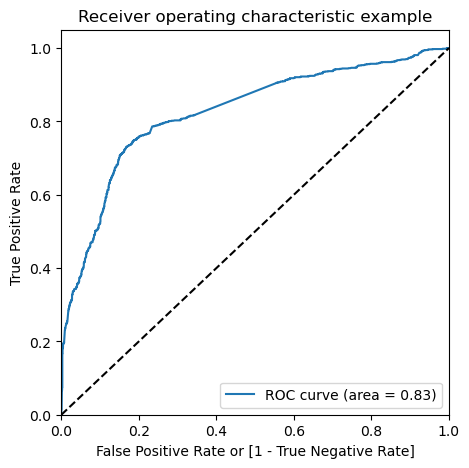

In [708]:
# Drawing ROC curve for Test Set
y_pred_final["Converted_Prob"].dropna()
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

The model demonstrates a strong predictive capability as indicated by an Area Under the Receiver Operating Characteristic (ROC) Curve of **0.83** out of 1. This high value suggests that the model performs well in distinguishing between positive and negative outcomes, making it a reliable tool for making predictions.

### 10.3 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

After obtaining the final predictions, the focus shifts to evaluating the performance of the predictive model on a test set. This involves comparing the predicted labels (final_predicted) with the actual labels (Converted) in order to calculate several performance metrics, including accuracy, precision, recall, and more. This analysis allows us to assess how effectively the model predicts the outcomes of interest.

In [709]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1397  280]
 [ 298  797]] 

************************************************** 

True Negative                    :  1397
True Positive                    :  797
False Negative                   :  298
False Positve                    :  280
Model Accuracy                   :  0.7915
Model Sensitivity                :  0.7279
Model Specificity                :  0.833
Model Precision                  :  0.74
Model Recall                     :  0.7279
Model True Positive Rate (TPR)   :  0.7279
Model False Positive Rate (FPR)  :  0.167


************************************************** 



- The evaluation metrics for the test set, including accuracy, sensitivity (recall), and specificity, indicate that the model performs consistently across different metrics.
- The accuracy of the model on the test set is approximately 79.15% which means that it correctly predicts 79.15% of the cases.
- The sensitivity (recall) of the model is around 72.79%, which means that it correctly identifies 72.79% of the positive cases.
- The specificity of the model is 83.30%, indicating that it accurately identifies 83.30% of the negative cases.
- **These metrics show that the final model, logm7, demonstrates good consistency in its performance on both the training and test sets, as the metrics are similar between the two sets.**

In [539]:
# features and their coefficicent from final model
parameters=logm7.params.sort_values(ascending=False)
parameters

Lead Source_welingak website               5.725393
Lead Source_reference                      3.670992
Current_occupation_working professional    2.823045
Total Time Spent on Website                1.073007
Lead Source_olark chat                     0.709279
Specialization_finance management         -0.330588
Lead Source_direct traffic                -0.460182
Lead Source_referral sites                -0.531226
const                                     -0.814626
Specialization_hospitality management     -1.046766
dtype: float64

NOTE:A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

 Adding **Lead Score** Feature to Test dataframe 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [540]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.361127,1,36
1,2376,1,0.828604,1,83
2,7766,1,0.763912,1,76
3,9199,0,0.200056,0,20
4,4359,1,0.870609,1,87


## Step-11: Hypothesis Testing (Wald Test)

Some tests that can be used to check the fitness of a logistic regression model:

1. **Wald Test:** This test assesses the significance of each coefficient in the logistic regression model. It calculates the Wald statistic for each coefficient and compares it to the critical value from the chi-square distribution to determine if the coefficient is significantly different from zero.

2. **Likelihood Ratio Test:** This test compares the likelihood of the current model to the likelihood of a reduced model where certain variables are excluded. It calculates the likelihood ratio statistic and compares it to the critical value from the chi-square distribution to determine if the reduced model is significantly worse than the current model.

3. **Hosmer-Lemeshow Test:** This test assesses the goodness of fit of the logistic regression model by comparing the observed and expected frequencies in different groups or bins of predicted probabilities. It calculates the chi-square statistic and compares it to the critical value from the chi-square distribution to determine if there is a significant lack of fit in the model.

4. **Deviance Test:** This test compares the deviance of the current model to the deviance of a saturated model where the model perfectly predicts all the observed data. It calculates the deviance statistic and compares it to the critical value from the chi-square distribution to determine if the current model is a significant improvement over the saturated model.

5. **Score Test:** This test assesses the overall fit of the logistic regression model by evaluating the agreement between the observed and predicted probabilities. It calculates the score statistic and compares it to the critical value from the chi-square distribution to determine if the model is a good fit to the data.

These tests can help evaluate different aspects of the logistic regression model's fitness and provide insights into its performance and goodness of fit. It is important to consider multiple tests and their results in order to get a comprehensive understanding of the model's fitness.

In [712]:
import statsmodels.api as sm
import scipy.stats as stats

# Fit the logistic regression model
logreg_model = sm.Logit(y, X)
logreg_results = logreg_model.fit()

# Get the parameter estimates and standard errors
params = logreg_results.params
param_stderr = logreg_results.bse

# Calculate the Wald statistic for each coefficient
wald_statistic = params / param_stderr
p_values = 2 * (1 - stats.norm.cdf(abs(wald_statistic)))

# Print the results
print("Wald Test Results:")
for i in range(len(params)):
    print(f"Variable: {X.columns[i]}, Coefficient: {params[i]:.4f}, Wald Statistic: {wald_statistic[i]:.4f}, p-value: {p_values[i]:.4f}")



Optimization terminated successfully.
         Current function value: 0.478807
         Iterations 8
Wald Test Results:
Variable: Total Time Spent on Website, Coefficient: 4.4811, Wald Statistic: 35.1075, p-value: 0.0000
Variable: Page Views Per Visit, Coefficient: -0.2050, Wald Statistic: -1.5992, p-value: 0.1098
Variable: Free_copy, Coefficient: -0.0350, Wald Statistic: -0.4414, p-value: 0.6589
Variable: Lead Source_Others, Coefficient: 0.6273, Wald Statistic: 1.1650, p-value: 0.2440
Variable: Lead Source_bing, Coefficient: -0.2152, Wald Statistic: -0.1948, p-value: 0.8456
Variable: Lead Source_direct traffic, Coefficient: -0.4909, Wald Statistic: -5.7632, p-value: 0.0000
Variable: Lead Source_facebook, Coefficient: 0.0458, Wald Statistic: 0.1244, p-value: 0.9010
Variable: Lead Source_olark chat, Coefficient: 0.6575, Wald Statistic: 6.6021, p-value: 0.0000
Variable: Lead Source_organic search, Coefficient: -0.0681, Wald Statistic: -0.7368, p-value: 0.4612
Variable: Lead Source_refer

**The code you provided executes the Wald test for each coefficient in the logistic regression model. The results include the coefficient estimates, the Wald statistics, and the corresponding p-values. **

Interpreting the results:
- The Wald statistic measures the significance of each coefficient in the model. Larger absolute values of the Wald statistic indicate more significant coefficients.
- The p-value associated with each coefficient represents the probability of observing a Wald statistic as extreme as the one calculated, assuming the null hypothesis that the coefficient is zero.
- If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the coefficient is statistically significant.

Based on the results obtained:
- The coefficient for "Total Time Spent on Website" is 4.4811, with a Wald statistic of 35.1075 and a p-value of 0.0000. This variable appears to have a significant positive effect on the conversion of leads.
- The coefficient for "Page Views Per Visit" is -0.2050, with a Wald statistic of -1.5992 and a p-value of 0.1098. This variable does not appear to be statistically significant in predicting lead conversion.
- Similarly, you can interpret the results for the other variables. Positive coefficients indicate a positive association with lead conversion, while negative coefficients indicate a negative association.

Remember to consider both the coefficient value and the associated p-value when interpreting the significance of each variable in the logistic regression model.

## Step-12: Final Conclusions:

#### Train:
- Model Accuracy                   :  0.7948
- Model Sensitivity                :  0.7295
- Model Specificity                :  0.8351
 
#### Test:
- Model Accuracy                   :  0.7915
- Model Sensitivity                :  0.7279
- Model Specificity                :  0.833

#### Insights:

- The logistic regression model achieved an accuracy of **79.78%** on the train dataset and **79.15%** on the test dataset.
- The sensitivity (also known as recall or true positive rate) of the model was **72.95%** on the train dataset and **72.79%** on the test dataset, using a cut-off value of **0.35**. **This indicates how well the model identifies leads that are likely to convert out of all potential converting leads.**
- The specificity (also known as true negative rate) of the model was **83.51%** on the train dataset and **83.30%** on the test dataset. **It measures how well the model identifies leads that are unlikely to convert out of all potential non-converting leads.**
- The evaluation metrics, including accuracy, sensitivity, and specificity, were consistently close between the train and test datasets, indicating that the model performs consistently across different metrics.
- The achieved sensitivity of around **72.95%** aligns with the target sensitivity set by the CEO of X Education.
- Overall, the model's performance is in line with the study's objectives, as it achieves a satisfactory accuracy and sensitivity in identifying potential converting leads.

####  Final Model Insights:
- The final Logistic Regression Model consists of 9 features.
- The top 3 features that have a positive contribution to predicting hot leads are:
  1. Lead Source_olark chat
  2. Specialization_finance management
  3. Total Time Spent on Website	
- The optimal cutoff probability point chosen for classifying leads is 0.35. Leads with a predicted probability greater than 0.35 are considered as converted leads **(hot leads),** while leads with a predicted probability smaller than 0.35 are considered as not converted leads **(cold leads).**